# フォルダ名の変更

子フォルダ名を"scratched wood" → "scratch"にする場合は以下を実行<br>
※ 子フォルダ名を直接書き込むのでコピーしておくこと

良品 　-> None<br>
不良品 -> 欠陥名

手作業が必要なフォルダ<br>
以下のコードを実行して出てきたフォルダは直接、子フォルダ名を欠陥名に編集 or "broken_chip" → "broken_chi"などにする

In [25]:
# ベースパス
base_folder = "/home/dataset/yyama_dataset/SD_images"

import os
import shutil

def delete_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
    except Exception as e:
        print(f"エラー：{e}")

def count_image_files(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png']
    image_count = 0
    for file in os.listdir(folder_path):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_count += 1
    return image_count

if os.path.isdir(base_folder):  # ベースフォルダが存在するかチェック
    for parent_folder in os.listdir(base_folder):
        parent_folder_path = os.path.join(base_folder, parent_folder)
        if os.path.isdir(parent_folder_path):  # parent_folder_pathがディレクトリであるかチェック
            for child_folder in os.listdir(parent_folder_path):
                child_folder_path = os.path.join(parent_folder_path, child_folder)
                if os.path.isdir(child_folder_path):  # child_folder_pathがディレクトリであるかチェック
                    num_images = count_image_files(child_folder_path)
                    if num_images == 0:
                        print(f"削除フォルダ名: {child_folder_path}, 枚数: {num_images}")
                        delete_folder(child_folder_path)
            if len(os.listdir(parent_folder_path)) == 0:
                print(f"削除フォルダ名: {parent_folder_path}")
                delete_folder(parent_folder_path)
import os
import re

# ベースフォルダが存在するかどうかを確認
if os.path.isdir(base_folder):
    # 親フォルダ内のサブフォルダを取得
    for folder_name in os.listdir(base_folder):
        subfolder_path = os.path.join(base_folder, folder_name)
        
        if os.path.isdir(subfolder_path):  # サブフォルダであるか確認
            # サブフォルダ内の子フォルダを取得
            for subfolder_name in os.listdir(subfolder_path):
                child_folder_path = os.path.join(subfolder_path, subfolder_name)
                
                if os.path.isdir(child_folder_path):  # 子フォルダであるか確認
                    # 子フォルダ内のファイル名を取得
                    files = os.listdir(child_folder_path)
                    
                    # ファイル名から数字部分を取得し、リストに保存
                    numbers = [int(re.search(r'\d+', file).group()) for file in files if re.search(r'\d+', file)]
                    
                    # ファイル名の重複チェックと変更
                    for file in files:
                        match = re.search(r'\d+', file)
                        if match:
                            number = int(match.group())
                            
                            # 同じ番号が複数存在する場合
                            if numbers.count(number) > 1:
                                new_number = 0
                                
                                # 重複していない番号を探す
                                while new_number in numbers:
                                    new_number += 1
                                
                                # 新しいファイル名を作成
                                new_file = file.replace(str(number), str(new_number))
                                new_file_path = os.path.join(child_folder_path, new_file)
                                
                                # ファイル名を変更
                                os.rename(
                                    os.path.join(child_folder_path, file), 
                                    new_file_path
                                )
                                
                                # ファイル名の変更を表示
                                print(f'{child_folder_path}/{file} -> {new_file_path}')
                                
                                # リストを更新
                                numbers.remove(number)
                                numbers.append(new_number)



In [26]:
# 欠陥キーワードリスト
anomalies = [
    "None",
    "torn",
    "scratch",
    "hole",
    "stain",
    "burn",
    "crack",
    "dent",
    "chip",
    "warp",
    "discolor",
    "rust",
    "corrosion",
    "peeling",
    "bubble",
    "blister",
    "tear",
    "cut",
    "abrasion",
    "scuff",
    "puncture",
    "fracture",
    "crease",
    "deformation",
    "mold",
    "mildew",
    "splinter",
    "gouge",
    "bend",
    "fading",
    "scorch",
    "smudge",
    "mark",
    "splotch",
    "grime",
    "erosion",
    "smear",
    "blemish",
    "bruise",
    "pitting",
    "chipping",
    "delamination",
    "flaking",
    "curling",
    "warping",
    "twist",
    "knot",
    "split",
    "misalignment",
    "bulge",
    "dimple",
    "waviness",
    "loose thread",
    "snag",
    "dye bleed",
    "disintegration",
    "loose seam",
    "crazing",
    "contamination",
    "spalling",
    "efflorescence",
    "scaling",
    "etching",
    "streak",
    "dirt",
    "ravel",
    "wrinkle",
    "tatter",
    "sagging",
    "drooping",
    "stretching",
    "shrinkage",
    "wobble",
    "imbalance",
    "roughness",
    "warpage",
    "inclusion",
    "speck",
    "pinhole",
    "adhesive failure",
    "oxidation",
    "wear",
    "fretting",
    "fatigue",
    "spatter",
    "loose connection",
    "crystallization",
    "carbon buildup",
    "tarnish",
    "uneven surface",
    "miscoloration",
    "loose wiring",
    "moisture damage",
    "loose bolt",
    "corroded",
    "swollen",
    "tear",
    "corrosion",
    "leakage",
    "swelling",
    "faded",
    "fading",
    "bent",
    "broken",
    "aged",
    "aging",
    "dog-eared",
    "contaminant",
    "contamination",
    "moss",
    "oxidized",
    "oxidation",
    "loose",
    "melted",
    "frayed",
    "fog",
    "worn",
    "wear",
    "cloudy",
    "clouding",
    "dead pixel",
    "blunt",
    "bluntness",
    "peeled",
    "spot",
    "missing teeth",
    "crumpled",
    "bulging",
    "clog",
    "kink",
    "leak",
    "insect-eaten",
    "rot",
    "wilt",
    "detached",
    "wormy",
    "wormhole",
    "leaning",
    "bleach",
    "unevenly",
    "unevenness",
    "uneven",
    "pitted",
    "pitting",
    "crushed",
    "misprint",
    "missing",
    "misaligned",
    "misalignment",
    "color bleed",
    "water damage",
    "wet",
    "brittle",
    "brittleness",
    "snapped",
    "misshapen",
    "wobbly",
    "Instability",
    "pilled",
    "pilling",
    "eroded",
    "erosion",
    "contaminated",
    "deformed",
    "shrunken",
    "shrinkage",
    "exposed",
    "blown",
    "corroded",
    "stripped",
    "pills",
    "pilling",
    "tangled",
    "damp",
    "dampness",
]

In [28]:
import os

# 欠陥キーワードリストと部分一致するかチェックする関数
def check_anomaly(word, anomaly_list):
    for anomaly in anomaly_list:
        if anomaly in word:
            return anomaly
    return None

base_folder = '/home/dataset/yyama_dataset/SD_images'

for parent_folder in os.listdir(base_folder):
    parent_path = os.path.join(base_folder, parent_folder)
    
    # ディレクトリであれば処理を行う
    if os.path.isdir(parent_path):
        
        # 欠陥キーワードリストと部分一致するかチェック
        matched_anomaly = check_anomaly(parent_folder.replace('_', ' '), anomalies)
        
        if matched_anomaly:
            print(f"Anomaly '{matched_anomaly}' found in parent folder '{parent_folder}'")

手作業のフォルダを完了させたあとに、以下自動作業を実行

In [29]:
import os

# 欠陥名リストと部分一致するかチェックする関数
def check_anomaly(word, anomaly_list, exception_dict):
    word = word.lower()
    for anomaly in anomaly_list:
        if anomaly.lower() in word:
            return exception_dict.get(anomaly, anomaly)
    return None

# フォルダ名を変更する関数
def rename_folders(base_path, anomalies, exception_dict):
    for parent_folder in os.listdir(base_path):
        parent_path = os.path.join(base_path, parent_folder)
        
        if os.path.isdir(parent_path):
            for sub_folder in os.listdir(parent_path):
                sub_path = os.path.join(parent_path, sub_folder)
                
                if sub_folder == parent_folder:
                    # 親フォルダとサブフォルダが同じ名前の場合、"None"にリネーム
                    new_sub_path = os.path.join(parent_path, "None")
                    os.rename(sub_path, new_sub_path)
                else:
                    # 部分一致チェック
                    sub_folder_ = sub_folder.replace('_', ' ')
                    sub_folder_ = sub_folder_.replace(parent_folder.replace('_', ' '), '')
                    matched_anomaly = check_anomaly(sub_folder_, anomalies, exception_dict)
                    
                    if matched_anomaly:
                        # 一致した欠陥名にサブフォルダをリネーム
                        new_sub_path = os.path.join(parent_path, matched_anomaly)
                        os.rename(sub_path, new_sub_path)
                    else:
                        # 一致しない場合、プログラムを停止
                        print(f"Anomaly not found for {sub_folder}. Stopping program.")
                        return

# 例外処理辞書 (例外はココと上の欠陥キーワードリストに追加する)
exception_dict = {
    "discolor": "discoloration",
    "torn": "tear",
    "corroded": "corrosion",
    "swollen": "swelling",
    "faded": "fading",
    "aged": "aging",
    "contaminant": "contamination",
    "contaminated": "contamination",
    "oxidized": "oxidation",
    "worn": "wear",
    "cloudy": "clouding",
    "blunt": "bluntness",
    "bulging": "bulge",
    "wormy": "wormhole",
    "unevenly": "unevenness",
    "uneven": "unevenness",
    "pitted": "pitting",
    "misaligned": "misalignment",
    "wet": "water damage",
    "brittle": "brittleness",
    "wobbly": "Instability",
    "pilled": "pilling",
    "eroded": "erosion",
    "deformed": "deformation",
    "shrunken": "shrinkage",
    "corroded": "corrosion",
    "pills": "pilling",
    "damp": "dampness",
}

# フォルダ名を変更
base_folder = '/home/dataset/yyama_dataset/SD_images'
rename_folders(base_folder, anomalies, exception_dict)

# ICL用データ作成<br>

### フォルダの選別
1. 子フォルダ内の画像枚数が1枚以下→子フォルダを削除
2. 親フォルダ内の子フォルダ数が1以下 or 良品フォルダがない→親フォルダごと削除

※　"scratched wood"のように、"製品＋欠陥"の場合と、"scratch"のように"欠陥"の場合とで、以下全て変更が必要です

In [30]:
import os

# 可視化
def list_folders(path, indent=0):
    # 指定されたパス内のすべてのエントリをリストアップ
    entries = os.listdir(path)

    for entry in entries:
        full_path = os.path.join(path, entry)

        # フォルダの場合
        if os.path.isdir(full_path):
            # インデントして表示
            print("  " * indent + f"📁 {entry}")
            # 再帰的にフォルダ内を探索
            list_folders(full_path, indent + 1)

# フォルダ構造を表示
print(f"📁 {base_folder}")
list_folders(base_folder)

📁 /home/dataset/yyama_dataset/SD_images
📁 bed
  📁 broken
  📁 None
  📁 stain
  📁 tear
📁 beer_can
  📁 crushed
  📁 dent
  📁 leak
  📁 misprint
  📁 None
  📁 rust
📁 bicycle_frame
  📁 crack
  📁 dent
  📁 None
  📁 rust
  📁 scratch
📁 CD
  📁 crack
  📁 discoloration
  📁 None
  📁 scratch
  📁 smudge
  📁 warp
📁 ceramic
  📁 chip
  📁 crack
  📁 discoloration
  📁 None
  📁 stain
📁 ceramic_ornament
  📁 broken
  📁 chip
  📁 None
📁 chain
  📁 broken
  📁 missing
  📁 None
  📁 rust
📁 concrete_bench
  📁 None
📁 cooking_pot
  📁 broken
  📁 burn
  📁 chip
  📁 crack
  📁 None
  📁 stain
📁 copper_mug
  📁 discoloration
  📁 None
  📁 tarnish
📁 cotton_shirt
  📁 fading
  📁 None
  📁 shrinkage
  📁 stain
  📁 tear
  📁 wrinkle
📁 curtain
  📁 burn
  📁 fading
  📁 tear
  📁 None
  📁 shrinkage
  📁 stain
📁 fabric_tote_bag
  📁 None
  📁 stain
📁 flange
  📁 bent
  📁 corrosion
  📁 crack
  📁 missing
  📁 None
  📁 rust
📁 glue
  📁 None
📁 gold_necklace
  📁 broken
  📁 None
📁 handbag
  📁 None
  📁 tear
📁 jeans_jacket
  📁 frayed
  📁 None
  📁 tear
📁 eras

In [35]:
import os
import shutil

# フォルダを削除する関数
def delete_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
    except Exception as e:
        print(f"エラー：{e}")

# 与えられたフォルダ内の画像ファイル数を数える関数
def count_image_files(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png']  # 画像ファイルの拡張子を追加
    image_count = 0
    if os.path.isdir(folder_path):  # この行を追加
        for file in os.listdir(folder_path):
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    return image_count

# 親フォルダと同名の子フォルダが存在するかどうかを確認する関数
def has_same_name_subfolder(parent_folder_path):
    parent_folder_name = os.path.basename(parent_folder_path)
    for child_folder in os.listdir(parent_folder_path):
        child_folder_path = os.path.join(parent_folder_path, child_folder)
        if os.path.isdir(child_folder_path) and child_folder == parent_folder_name:
            return True
    return False
    
base_folder = '/home/dataset/yyama_dataset/SD_images'
cnt=0
for parent_folder in os.listdir(base_folder):
    parent_folder_path = os.path.join(base_folder, parent_folder)
    if os.path.isdir(parent_folder_path):  # この行を追加
        for child_folder in os.listdir(parent_folder_path):
            child_folder_path = os.path.join(parent_folder_path, child_folder)
            if os.path.isdir(child_folder_path):  # この行を追加
                num_images = count_image_files(child_folder_path)
                # 画像枚数が2枚未満の場合、その子フォルダを削除
                if num_images < 2:
                    print(f"削除フォルダ名: {child_folder_path}, 枚数: {num_images}")
                    delete_folder(child_folder_path)
        # 親フォルダ内の子フォルダ数が2未満 or 良品フォルダがない場合、親フォルダを削除
        """以下どちらか選択"""
        if len(os.listdir(parent_folder_path)) < 2 or "None" not in os.listdir(parent_folder_path): # "欠陥"の場合
        # if len(os.listdir(parent_folder_path)) < 2 or not has_same_name_subfolder(parent_folder_path): # "製品+欠陥"の場合
            print(f"削除フォルダ名: {parent_folder_path}")
            # cnt+=1
            delete_folder(parent_folder_path)
print(cnt)

削除フォルダ名: /home/dataset/yyama_dataset/SD_images/concrete_bench
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/fabric_tote_bag
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/glue
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/eraser
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/plastic_bottle
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/ruler
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/seal
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/magazine_cover
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/cloth_mask
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/sticker
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/pin
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/rubber_ball
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/laptop_casing
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/sketch
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/spring
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/drawing
削除フォルダ名: /home/dataset/yyama_dataset/SD_images/paperback_novel
削除フォルダ名: /home/dataset/yyama_d

#### 拡張子を除いたフォルダ名の重複を修正<br>
punctured_tire内に"image_49.jpeg"と"image_49.jpg"が存在したため、全てチェックする

In [36]:
import os
import re

base_folder = '/home/dataset/yyama_dataset/SD_images'

# 親フォルダ内のサブフォルダを取得
for folder_name in os.listdir(base_folder):
    subfolder_path = os.path.join(base_folder, folder_name)
    
    # サブフォルダ内の子フォルダを取得
    for subfolder_name in os.listdir(subfolder_path):
        child_folder_path = os.path.join(subfolder_path, subfolder_name)
        
        # 子フォルダ内のファイル名を取得
        files = os.listdir(child_folder_path)
        
        # ファイル名から数字部分を取得し、リストに保存
        numbers = [int(re.search(r'\d+', file).group()) for file in files]
        
        # ファイル名の重複チェックと変更
        for file in files:
            # ファイル名から番号を取得
            number = int(re.search(r'\d+', file).group())
            
            # 同じ番号が複数存在する場合
            if numbers.count(number) > 1:
                new_number = 0
                
                # 重複していない番号を探す
                while new_number in numbers:
                    new_number += 1
                
                # 新しいファイル名を作成
                new_file = file.replace(str(number), str(new_number))
                new_file_path = os.path.join(child_folder_path, new_file)
                
                # ファイル名を変更
                os.rename(
                    os.path.join(child_folder_path, file), 
                    new_file_path
                )
                
                # ファイル名の変更を表示
                print(f'{child_folder_path}/{file} -> {new_file_path}')
                
                # リストを更新
                numbers.remove(number)
                numbers.append(new_number)

train：val = 8：2 に分ける

In [38]:
import os
import shutil
import random

# ディレクトリのパスを指定
src_dir = base_folder
train_dir = '/home/dataset/yyama_dataset/tasks/SD/train/'
val_dir = '/home/dataset/yyama_dataset/tasks/SD/val/'

# trainとvalの割合
ratio = 0.8

# trainとvalのディレクトリを作成
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# src_dir内の各フォルダに対して
for root, dirs, files in os.walk(src_dir):
    # 画像のリストを取得し、シャッフル
    images = [f for f in files if os.path.isfile(os.path.join(root, f))]
    random.shuffle(images)
    
    # trainとvalに分割
    train_images = images[:int(ratio * len(images))]
    val_images = images[int(ratio * len(images)):]
    
    # trainとvalのサブディレクトリを作成
    train_folder = os.path.join(train_dir, os.path.relpath(root, src_dir))
    val_folder = os.path.join(val_dir, os.path.relpath(root, src_dir))
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(val_folder, exist_ok=True)
    
    # 画像をコピー
    for img in train_images:
        shutil.copy(os.path.join(root, img), os.path.join(train_folder, img))
    for img in val_images:
        shutil.copy(os.path.join(root, img), os.path.join(val_folder, img))

print('Images copied to train and val folders.')

Images copied to train and val folders.


### valとtrainの調整<br>
[val]
1. 画像 < 2 の子フォルダはtrainへ
2. 子フォルダ < 2 or 良品フォルダがない場合、全てtrainへ

[train]
1. 画像 < 2 の子フォルダ → valからtrainへ
2. 子フォルダ < 2 or 良品フォルダがない場合 → valから全てtrainへ

[val] もう一度
1. 画像 < 2 の子フォルダはtrainへ
2. 子フォルダ < 2 or 良品フォルダがない場合、全てtrainへ

In [81]:
import os
import shutil
from pathlib import Path

# 子フォルダを移動させる関数
def move_child_folder(src, dst):
    """
    :param src: 移動するフォルダのパス
    :param dst: 移動先のパス
    """
    if os.path.exists(dst):
        # 移動先のディレクトリが存在する場合、ファイルのみを移動
        for file_name in os.listdir(src):
            full_file_name = os.path.join(src, file_name)
            if os.path.isfile(full_file_name):
                shutil.move(full_file_name, dst)
        # もとのフォルダを削除
        os.rmdir(src)
    else:
        # 移動先のフォルダが存在しない場合、フォルダごと移動
        if not os.path.exists(os.path.dirname(dst)):
            os.makedirs(os.path.dirname(dst))
        shutil.move(src, os.path.join(os.path.dirname(dst), os.path.basename(src)))

# 親フォルダごと移動させる関数
def move_parent_folder(src, dst):
    """
    :param src: 移動するフォルダのパス
    :param dst: 移動先のパス
    """
    for src_dir, dirs, files in os.walk(src):
        dst_dir = src_dir.replace(src, dst, 1)
        if not os.path.exists(dst_dir):
            os.makedirs(dst_dir)
        for file_ in files:
            src_file = os.path.join(src_dir, file_)
            dst_file = os.path.join(dst_dir, file_)
            if os.path.exists(dst_file):
                os.remove(dst_file)
            shutil.move(src_file, dst_dir)
    shutil.rmtree(src)
    
# 移動先のパスを生成する関数
def change_path(path, new_base):
    # パスを分割
    parts = path.split('/')
    # 新しいベースでパスを再構築
    parts[1] = new_base
    return '/'.join(parts)

# 与えられたフォルダ内の画像ファイル数を数える関数
def count_image_files(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png']  # 画像ファイルの拡張子を追加
    image_count = 0
    for file in os.listdir(folder_path):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_count += 1
    return image_count

def val(val_dir, val_base):
    cnt=0
    for parent_folder in os.listdir(val_dir):
        parent_folder_path = os.path.join(val_dir, parent_folder)
        # print(f'parent_folder_path : {parent_folder_path}')
        pf = Path(parent_folder_path).name + "/"
        for child_folder in os.listdir(parent_folder_path):
            child_folder_path = os.path.join(parent_folder_path, child_folder)
            cf = Path(child_folder_path).name
            num_images = count_image_files(child_folder_path)
            # print(f"フォルダ名: {child_folder_path}, 枚数: {num_images}")
            # 画像枚数が2枚未満の場合、その子フォルダをtrainへ移動
            if num_images < 2:
                cnt+=1
                # new_path = change_path(child_folder_path, val_base)
                # print(f"移動フォルダ名: {child_folder_path}, 移動先: {val_base+pf+cf}, 枚数: {num_images}")
                move_child_folder(child_folder_path, val_base+pf+cf)

        # 親フォルダ内の子フォルダ数が2未満 or 良品フォルダがない場合、親フォルダごとtrainへ移動
        """以下どちらか選択"""
        if len(os.listdir(parent_folder_path)) < 2 or "None" not in os.listdir(parent_folder_path): # "欠陥"の場合
        # if len(os.listdir(parent_folder_path)) < 2 or not has_same_name_subfolder(parent_folder_path): # "製品+欠陥"の場合
            cnt+=1
            new_path = change_path(parent_folder_path, val_base)
            print(f"asleih;aflwefgh;a移動フォルダ名: {parent_folder_path}, 移動先: {val_base+pf+cf}")
            move_parent_folder(parent_folder_path, val_base+pf+cf)
    print(cnt)
            
def train(train_dir, train_base):
    cnt=0
    for parent_folder in os.listdir(train_dir):
        parent_folder_path = os.path.join(train_dir, parent_folder)
        pf = Path(parent_folder_path).name + "/"
        for child_folder in os.listdir(parent_folder_path):
            child_folder_path = os.path.join(parent_folder_path, child_folder)
            cf = Path(child_folder_path).name
            num_images = count_image_files(child_folder_path)
            # print(f"フォルダ名: {child_folder_path}, 枚数: {num_images}")
            # 画像枚数が2枚未満の場合、その子フォルダをvalから移動
            if num_images < 2:
                cnt+=1
                print(f"移動フォルダ名: {child_folder_path}")
                print(f"移動先: {train_base+pf+cf}")
                # child_folder_path = change_path(child_folder_path, train_base)
                print(f"移動フォルダ名: {child_folder_path}, 移動先: {train_base+pf+cf}, 枚数: {num_images}")

                move_child_folder(child_folder_path, train_base+pf+cf)


        # 親フォルダ内の子フォルダ数が2未満 or 良品フォルダがない場合、親フォルダごとvalから移動
        """以下どちらか選択"""
        if len(os.listdir(parent_folder_path)) < 2 or "None" not in os.listdir(parent_folder_path): # "欠陥"の場合
        # if len(os.listdir(parent_folder_path)) < 2 or not has_same_name_subfolder(parent_folder_path): # "製品+欠陥"の場合
            cnt+=1
            # print(f'new path:{parent_folder_path}')
            # new_path = change_path(parent_folder_path, train_base)
            # print(f"?fbgosnvalms移動フォルダ名: {new_path}, 移動先: { train_base+pf+cf}")
            move_parent_folder(parent_folder_path,  train_base+pf+cf)
    print(cnt)

# train_dir = '/home/dataset/yyama_dataset/tasks/SD/train/'
# train_base = '/home/dataset/yyama_dataset/tasks/SD/val/'
# val_dir = '/home/dataset/yyama_dataset/tasks/SD/val/'
# val_base = '/home/dataset/yyama_dataset/tasks/SD/train/'

train_dir = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train/'
train_base = 'home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val/'
val_dir = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val/'
val_base = 'home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train/'


val(val_dir, val_base)
train(train_dir, train_base)
val(val_dir, val_base)

0
移動フォルダ名: /home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train/CD_disk/warp
移動先: home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val/CD_disk/warp
移動フォルダ名: /home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train/CD_disk/warp, 移動先: home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val/CD_disk/warp, 枚数: 1
移動フォルダ名: /home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train/chair/loose
移動先: home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val/chair/loose
移動フォルダ名: /home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train/chair/loose, 移動先: home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val/chair/loose, 枚数: 1
移動フォルダ名: /home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train/concrete_driveway/erosion
移動先: home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val/concrete_driveway/erosion
移動フォルダ名: /home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train/concrete_driveway/erosion, 移動先: home/dataset/yyama_dataset/tasks/SD/no_duplicated_da

In [82]:
import os

def find_missing_folders(folder1, folder2):
    """
    指定された2つのフォルダ間で存在しないフォルダを見つけて出力します。
    Args:
        folder1 (str): 最初のフォルダのパス
        folder2 (str): 2番目のフォルダのパス
    """
    # フォルダ1内のフォルダリストを取得
    folders1 = os.listdir(folder1)

    # フォルダ2内のフォルダリストを取得
    folders2 = os.listdir(folder2)

    # フォルダ1に存在し、フォルダ2に存在しないフォルダを見つける
    missing_folders = [folder for folder in folders1 if folder not in folders2]

    # 結果を出力
    print(f"フォルダ '{folder1}' にあって '{folder2}' に存在しないフォルダ:")
    for folder in missing_folders:
        print(folder)

# 使用例
# folder1_path = '/home/dataset/yyama_dataset/tasks/SD/train'
# folder2_path = '/home/dataset/yyama_dataset/tasks/SD/val'
folder1_path = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train'
folder2_path = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val'
find_missing_folders(folder1_path, folder2_path)
find_missing_folders(folder2_path, folder1_path)

フォルダ '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train' にあって '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val' に存在しないフォルダ:
cotton_towel
gypsum_board
linen_napkin
polyester_pants
printer
silver_necklace
vinyl_siding
watercolor_on_paper
whisk
wool_rug
canvas_shoes
fabric_cushion
ink_pen
leather_bag
o-ring
rubber_hose
stainless_steel_sink
transistor
candle
denim
gold_foil
sapphire_gem
shaft
steel_ladder
switch
ball_bearing
hair_brush
metal_grills
plastic_container
quartz_watch
aluminum_frame
bowl
computer_mouse
suede_bag
teapot
wooden_toy
binder
concrete_pillar
gold_necklace
graphite_pencil_drawing
leather_jacket
wicker_basket
woven_basket
card
copper_mug
cork_board
leather_belt
lotion_bottle
backpack
denim_jeans
electric_switch
ethernet_cable
metal_coin
mouse
nylon_backpack
rod
wallet
camera
canvas_painting
brass_instrument
handbag
laminated_wood
leather_sofa
marble_countertop
steel_beam
wooden_chair
button
HDMI_port
kitchen_faucet
marble_statue
rubber_band
woode

context : query = 1 : 1 に分ける

In [89]:
import os
import shutil
import random

def split_context_query(src_dir, train_context_dir, train_query_dir):
    # train_contextとtrain_queryのディレクトリを作成

    os.makedirs(train_context_dir, exist_ok=True)
    os.makedirs(train_query_dir, exist_ok=True)

    # src_dir内の各フォルダに対して
    for root, dirs, files in os.walk(src_dir):
        # 画像のリストを取得し、シャッフル
        images = [f for f in files if os.path.isfile(os.path.join(root, f))]
        random.shuffle(images)
        
        # train_contextとtrain_queryに分割
        train_context_images = images[:len(images)//2]
        train_query_images = images[len(images)//2:]
        print(f'context:{len(train_context_images)}')
        print(f'query:{len(train_query_images)}')
        print(f'query : {train_query_images}')
        
        # train_contextとtrain_queryのサブディレクトリを作成
        train_context_folder = os.path.join(train_context_dir, os.path.relpath(root, src_dir))
        train_query_folder = os.path.join(train_query_dir, os.path.relpath(root, src_dir))
        print(train_query_folder)
        os.makedirs(train_context_folder, exist_ok=True)
        os.makedirs(train_query_folder, exist_ok=True)
        
        # 画像をコピー
        for img in train_context_images:
            shutil.copy(os.path.join(root, img), os.path.join(train_context_folder, img))
        for img in train_query_images:
            shutil.copy(os.path.join(root, img), os.path.join(train_query_folder, img))

    print('Images copied to train_context and train_query folders.')
    
# ディレクトリのパスを指定
# src_dir = '/home/dataset/yyama_dataset/tasks/SD/duplicated_data/train'
# train_context_dir = '/home/dataset/yyama_dataset/tasks/SD/duplicated_data/train_context/'
# train_query_dir =   '/home/dataset/yyama_dataset/tasks/SD/duplicated_data/train_query/'
# split_context_query(src_dir, train_context_dir, train_query_dir)

# src_dir = '/home/dataset/yyama_dataset/tasks/SD/duplicated_data/val'
# train_context_dir = '/home/dataset/yyama_dataset/tasks/SD/duplicated_data/val_context/'
# train_query_dir = '/home/dataset/yyama_dataset/tasks/SD/duplicated_data/val_query/'
# split_context_query(src_dir, train_context_dir, train_query_dir)

src_dir = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train'
train_context_dir = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_context/'
train_query_dir = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_query/'
split_context_query(src_dir, train_context_dir, train_query_dir)

src_dir = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val'
train_context_dir = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val_context/'
train_query_dir = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val_query/'
split_context_query(src_dir, train_context_dir, train_query_dir)

context:0
query:0
query : []
/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_query/.
context:0
query:0
query : []
/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_query/blu-ray_disc
context:1
query:1
query : ['image_1.jpg']
/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_query/blu-ray_disc/crack
context:7
query:7
query : ['image_26.jpg', 'image_28.jpg', 'image_0.jpg', 'image_20.jpg', 'image_13.jpg', 'image_8.jpg', 'image_24.jpg']
/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_query/blu-ray_disc/None
context:2
query:2
query : ['image_16.jpg', 'image_8.jpg']
/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_query/blu-ray_disc/scratch
context:0
query:0
query : []
/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_query/brick_wall
context:2
query:2
query : ['image_18.jpg', 'image_70.jpg']
/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_query/brick_wall/chip
context:16
query:17
query : ['image_68.jp

context, queryの一方にしか存在しないフォルダがないか確認

In [90]:
import os

def diff(dir1, dir2):
    # train_contextとtrain_queryのサブディレクトリを取得
    folders1 = [os.path.relpath(root, dir1) for root, _, _ in os.walk(dir1)]
    folders2 = [os.path.relpath(root, dir2) for root, _, _ in os.walk(dir2)]

    # train_contextに存在し、train_queryに存在しないフォルダを出力
    unique_folders = set(folders1) - set(folders2)
    print(f"{dir1}に存在し、{dir2}に存在しないフォルダ:")
    for folder in unique_folders:
        print(folder)
        
# ディレクトリのパスを指定
train_context_dir = '/home/dataset/yyama_dataset/tasks/SD/duplicated_data/train_context/'
train_query_dir = '/home/dataset/yyama_dataset/tasks/SD/duplicated_data/train_query/'

diff(train_context_dir, train_query_dir)
diff(train_query_dir, train_context_dir)

train_context_dir = '/home/dataset/yyama_dataset/tasks/SD/duplicated_data/val_context/'
train_query_dir = '/home/dataset/yyama_dataset/tasks/SD/duplicated_data/val_query/'

diff(train_context_dir, train_query_dir)
diff(train_query_dir, train_context_dir)

# ディレクトリのパスを指定
train_context_dir = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_context/'
train_query_dir = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_query/'

diff(train_context_dir, train_query_dir)
diff(train_query_dir, train_context_dir)

train_context_dir = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val_context/'
train_query_dir = '/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val_query/'

diff(train_context_dir, train_query_dir)
diff(train_query_dir, train_context_dir)

/home/dataset/yyama_dataset/tasks/SD/duplicated_data/train_context/に存在し、/home/dataset/yyama_dataset/tasks/SD/duplicated_data/train_query/に存在しないフォルダ:
/home/dataset/yyama_dataset/tasks/SD/duplicated_data/train_query/に存在し、/home/dataset/yyama_dataset/tasks/SD/duplicated_data/train_context/に存在しないフォルダ:
/home/dataset/yyama_dataset/tasks/SD/duplicated_data/val_context/に存在し、/home/dataset/yyama_dataset/tasks/SD/duplicated_data/val_query/に存在しないフォルダ:
/home/dataset/yyama_dataset/tasks/SD/duplicated_data/val_query/に存在し、/home/dataset/yyama_dataset/tasks/SD/duplicated_data/val_context/に存在しないフォルダ:
/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_context/に存在し、/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_query/に存在しないフォルダ:
/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_query/に存在し、/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_context/に存在しないフォルダ:
/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val_context/に存在し、/home/dataset/yyama_dataset/t

## ○○_instructions.jsonの作成

In [39]:
import os

base_folder = "./jsons/full_images_seihin_defect_name+longQA"  # jsonファイルを保存するベースフォルダのパス
os.makedirs(base_folder, exist_ok=True)

In [53]:
import os
import json
# コンテキストのフォルダを先に実行すること

def natural_sort_key(s):
    """
    ファイル名の数字部分を考慮してソートするためのキー関数
    """
    import re
    return [int(text) if text.isdigit() else text.lower() for text in re.split('(\d+)', s)]

def generate_json_from_directory(directory_path, output_json_path): # コンテキスト用
    output = {"data": {}}
    i = 0
    # メインディレクトリ内のサブディレクトリを走査
    for main_folder in os.listdir(directory_path):
        main_folder_path = os.path.join(directory_path, main_folder)
        
        # サブディレクトリがディレクトリであるかの確認
        if os.path.isdir(main_folder_path):
            
            # サブディレクトリ内のサブディレクトリを走査
            for sub_folder in os.listdir(main_folder_path):
                sub_folder_path = os.path.join(main_folder_path, sub_folder)
                
                # サブディレクトリ内のファイルを昇順に走査
                for image_file in sorted(os.listdir(sub_folder_path), key=natural_sort_key):
                    # 画像ファイルの拡張子を除去
                    image_name_without_extension = os.path.splitext(image_file)[0]
                    
                    # キーの名前を生成
                    key_name = f"{main_folder}+{sub_folder}+{image_name_without_extension}"
                    
                    # JSONのデータ構造を生成
                    output["data"][key_name] = {
                        "instruction": "",
                        "answer": "",
                        "flag": "context",
                        "image_ids": [key_name],
                        "rel_ok_ins_ids": [],
                        "rel_ng_ins_ids": [],
                        "label": i
                    }
                i += 1
    
    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump(output, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
output_json_path = f"/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_instructions.json"
context_path = "/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/train_context"
generate_json_from_directory(context_path, output_json_path)

output_json_path = "/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val_instructions.json"
context_path = "/home/dataset/yyama_dataset/tasks/SD/no_duplicated_data/val_context"
generate_json_from_directory(context_path, output_json_path)

In [54]:
import os
import json
import random
# コンテキストのフォルダを実行した後に実行すること

def natural_sort_key(s):
    """
    ファイル名の数字部分を考慮してソートするためのキー関数
    """
    import re
    return [int(text) if text.isdigit() else text.lower() for text in re.split('(\d+)', s)]

def generate_and_merge_json_from_directory(directory_path, old_json_path, NUM): #クエリ用
    # 以前のJSONを読み込む
    with open(old_json_path, "r", encoding="utf-8") as f:
        old_data = json.load(f)

    new_data = {"data": {}}
    i = 0
    # メインディレクトリ内のサブディレクトリを走査
    for main_folder in os.listdir(directory_path):
        main_folder_path = os.path.join(directory_path, main_folder)

        # サブディレクトリがディレクトリであるかの確認
        if os.path.isdir(main_folder_path):

            # サブディレクトリ内のサブディレクトリを走査
            for sub_folder in os.listdir(main_folder_path):
                sub_folder_path = os.path.join(main_folder_path, sub_folder)

                # サブディレクトリ内のファイルを昇順に走査
                for image_file in sorted(os.listdir(sub_folder_path), key=natural_sort_key):
                    # 画像ファイルの拡張子を除去
                    image_name_without_extension = os.path.splitext(image_file)[0]

                    # キーの名前を生成
                    key_name = f"{main_folder}+{sub_folder}+{image_name_without_extension}"

                    # rel_ok_ins_idsの値を取得
                    """以下どちらか選択"""
                    # related_ok_keys = [key for key in old_data["data"].keys() if key.startswith(f"{main_folder}+None")] # "欠陥"の場合
                    related_ok_keys = [key for key in old_data["data"].keys() if key.startswith(f"{main_folder}+{main_folder}+")] # "製品+欠陥"の場合
                    rel_ok_ins_ids = random.sample(related_ok_keys, min(NUM, len(related_ok_keys)))

                    # rel_ng_ins_idsの値を取得
                    """以下どちらか選択"""
                    # if sub_folder == "None": # "欠陥"の場合
                    if main_folder==sub_folder: # "製品+欠陥"の場合
                        """以下どちらか選択"""
                        # related_ng_keys = [key for key in old_data["data"].keys() if key.startswith(f"{main_folder}+") and not key.startswith(f"{main_folder}+None")] # "欠陥"の場合
                        related_ng_keys = [key for key in old_data["data"].keys() if key.startswith(f"{main_folder}+") and not key.startswith(f"{main_folder}+{main_folder}+")] # "製品+欠陥"の場合
                        related_ng_key_lists = {}
                        for key in related_ng_keys:
                            prefix = key.split('+')[1]
                            if prefix not in related_ng_key_lists:
                                related_ng_key_lists[prefix] = []
                            related_ng_key_lists[prefix].append(key)

                        rel_ng_ins_ids = []
                        while len(rel_ng_ins_ids) < NUM and related_ng_key_lists:
                            for prefix in list(related_ng_key_lists.keys()):
                                if related_ng_key_lists[prefix]:
                                    selected_key = random.choice(related_ng_key_lists[prefix])
                                    rel_ng_ins_ids.append(selected_key)
                                    related_ng_key_lists[prefix].remove(selected_key)
                                else:
                                    del related_ng_key_lists[prefix]
                    else: # 不良品の場合
                        related_ng_keys = [key for key in old_data["data"].keys() if key.startswith(f"{main_folder}+{sub_folder}+")]
                        rel_ng_ins_ids = random.sample(related_ng_keys, min(NUM, len(related_ng_keys)))

                    # JSONのデータ構造を生成
                    new_data["data"][key_name] = {
                        "instruction": "",
                        "answer": "",
                        "flag": "query",
                        "image_ids": [key_name],
                        "rel_ok_ins_ids": rel_ok_ins_ids,
                        "rel_ng_ins_ids": rel_ng_ins_ids,
                        "label": i
                    }
                i += 1

    # 既存のJSONデータに新しいデータをマージ
    old_data["data"].update(new_data["data"])

    # JSONをファイルに書き出し
    # old_json_path = "output.json"
    with open(old_json_path, "w", encoding="utf-8") as json_file:
        json.dump(old_data, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
output_json_path = f"{base_folder}/train_instructions.json"
query_path = "./full_images_train_query"
NUM = 5 # 良品、不良品をそれぞれ5枚ずつ選ぶ
generate_and_merge_json_from_directory(query_path, output_json_path, NUM)

output_json_path = f"{base_folder}/val_instructions.json"
query_path = "./full_images_val_query"
NUM = 5 # 良品、不良品をそれぞれ5枚ずつ選ぶ
generate_and_merge_json_from_directory(query_path, output_json_path, NUM)

In [55]:
# 数の確認
def count_data(json_path):
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)["data"]
        
    entries = [item for item in data.values() if item["flag"] == "context"]
    count = len(entries)
    print(f"context: {count}")
        
    entries = [item for item in data.values() if item["flag"] == "query"]
    count = len(entries)
    print(f"query: {count}")

print("train")
json_path = f"{base_folder}/train_instructions.json"
count_data(json_path)

print("val")
json_path = f"{base_folder}/val_instructions.json"
count_data(json_path)

train
context: 7165
query: 7678
val
context: 1292
query: 1556


### instructionとanswerを埋める

In [56]:
import json
import os

# 指定されたリスト形式の文字列を作成する関数
def generate_list_string(items):
    # アンダースコアをスペースに変換
    items = [item.replace('_', ' ') for item in items]
    
    if len(items) == 1:
        return items[0]
    elif len(items) == 2:
        return f"{items[0]} and {items[1]}"
    else:
        return ", ".join(items[:-1]) + f", and {items[-1]}"

def fill_instruction_and_answer(json_path, train_context_dir):
    # JSONを読み込む
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)["data"]

    # ['data']からキーを順に読み込む
    for key, value in data.items():
        # キーの名前から親フォルダ名と子フォルダ名を認識する
        parent_folder, child_folder, _ = key.split("+")

        # "./1_train_context/親フォルダ名"にアクセスし、その中にある子フォルダ名をリスト化する
        subfolder_list = os.listdir(os.path.join(train_context_dir, parent_folder))
        subfolder_list = [folder for folder in subfolder_list if folder != "None"] # 欠陥名のみリスト化

        # "instruction"にテキストを入力する
        subfolder_string = generate_list_string(subfolder_list)
        parent_folder__ = parent_folder.replace('_', ' ')
        # long
        value["instruction"] = f'This is an image of {parent_folder__}. Does this {parent_folder__} have any defects such as {subfolder_string}?'
        # short
        # value["instruction"] = f'This is an image of {parent_folder__}. Does this {parent_folder__} have any defects?'
        # latest long
        # value["instruction"] = f'This is an image of {parent_folder__}. Does this {parent_folder__} have any defects such as {subfolder_string}? If there are any defects, please provide the defect name. If not, please say None.'
        # not object name
        # value["instruction"] = f'Does this image have any defects? If there are any defects, please provide the defect name. If not, please say None.'
        # product
        # value["instruction"] = f'This is an image of {parent_folder__}. Does this image have any defects? If there are any defects, please provide the defect name. If not, please say None.'
        
        
        # "answer"にテキストを入力する
        # if child_folder == "None": # "欠陥"の場合
        if child_folder == parent_folder: # "製品+欠陥"の場合
            value["answer"] = f'No. This {parent_folder__} does not have any defects such as {subfolder_string}, so it is non-defective.'
            # value["answer"] = f'No. This {parent_folder__} does not have any defects, so it is non-defective.'
            # value["answer"] = f'No.'
            # value["answer"] = f'No None'
        else:
            child_folder = child_folder.replace('_', ' ')
            value["answer"] = f'Yes. This {parent_folder__} has some {child_folder}, so it is defective.'
            # value["answer"] = f'Yes.'
            # value["answer"] = f'Yes {child_folder}'

    # JSONをファイルに書き出し
    with open(json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": data}, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
output_json_path = f"{base_folder}/train_instructions.json"
train_context_dir = "./full_images_train_context" # コンテキストのみでok (クエリと同じフォルダ構成のため)
fill_instruction_and_answer(output_json_path, train_context_dir)

output_json_path = f"{base_folder}/val_instructions.json"
train_context_dir = "./full_images_val_context" # コンテキストのみでok (クエリと同じフォルダ構成のため)
fill_instruction_and_answer(output_json_path, train_context_dir)

## ○○_train.jsonの作成

In [59]:
import json
import random

def create_visual_inspection_train(input_json_path, output_json_path, NUM_PAIRS):
    # JSONを読み込む
    with open(input_json_path, "r", encoding="utf-8") as f:
        data = json.load(f)["data"]

    train_data = {}

    # ['data']からキーを順に読み込む
    for key, value in data.items():
        # 'flag'=='query'のキーを選択
        if value["flag"] == "query":
            # "rel_ok_ins_ids"と"rel_ng_ins_ids"を読み込み
            ok_ids = value["rel_ok_ins_ids"]
            ng_ids = value["rel_ng_ins_ids"]

            # すべての組み合わせをリストに保存
            combinations = []
            for ok_id in ok_ids:
                for ng_id in ng_ids:
                    combinations.append([ok_id, ng_id])

            # リスト内の各組内の要素をランダムにシャッフル
            for combination in combinations:
                random.shuffle(combination)

            # キー名を更新してデータを保存
            random.shuffle(combinations)
            for i, combination in enumerate(combinations[:NUM_PAIRS]):
                train_data[f"{key}={i}"] = combination

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump(train_data, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
NUM_PAIRS = 25 # 1つのクエリに対して生成する組み合わせの数
input_json_path = f"{base_folder}/train_instructions.json"
output_json_path = f"{base_folder}/train_pairs{NUM_PAIRS}_train.json"
create_visual_inspection_train(input_json_path, output_json_path, NUM_PAIRS)

NUM_PAIRS__ = 1 # 1つのクエリに対して生成する組み合わせの数（valは1にするとクエリが一回のみ）
input_json_path = f"{base_folder}/val_instructions.json"
output_json_path = f"{base_folder}/val_pairs{NUM_PAIRS__}_train.json"
create_visual_inspection_train(input_json_path, output_json_path, NUM_PAIRS__)

In [60]:
# 数の確認
def count_data(json_path):
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
        
    count = len(data.keys())
    print(f"ペア数: {count}")
    # oks = [key for key in data.keys() if key.split("+")[1] == "None"] # "欠陥"の場合
    oks = [key for key in data.keys() if key.split("+")[0] == key.split("+")[1]] # "製品+欠陥"の場合
    print(f"クエリ良品: {len(oks)}")
    # ngs = [key for key in data.keys() if key.split("+")[1] != "None"] # "欠陥"の場合
    ngs = [key for key in data.keys() if key.split("+")[0] != key.split("+")[1]] # "製品+欠陥"の場合
    print(f"クエリ不良品: {len(ngs)}")
    
print("train")
# NUM_PAIRS = 25
json_path = f"{base_folder}/train_pairs{NUM_PAIRS}_train.json"
count_data(json_path)

print("val")
# NUM_PAIRS__ = 1
json_path = f"{base_folder}/val_pairs{NUM_PAIRS__}_train.json"
count_data(json_path)

train
ペア数: 138963
クエリ良品: 78071
クエリ不良品: 60892
val
ペア数: 1556
クエリ良品: 733
クエリ不良品: 823


## ○○_instructions.jsonの作成（Frame3）

In [1]:
import os

base_folder = "./jsons/frame3/full_images_defect_name_longQ"  # jsonファイルを保存するベースフォルダのパス
os.makedirs(base_folder, exist_ok=True)

In [3]:
import os
import json
# コンテキストのフォルダを先に実行すること

def natural_sort_key(s):
    """
    ファイル名の数字部分を考慮してソートするためのキー関数
    """
    import re
    return [int(text) if text.isdigit() else text.lower() for text in re.split('(\d+)', s)]

def generate_json_from_directory(directory_path, output_json_path): # コンテキスト用
    output = {"data": {}}
    i = 0
    # メインディレクトリ内のサブディレクトリを走査
    for main_folder in os.listdir(directory_path):
        main_folder_path = os.path.join(directory_path, main_folder)
        
        # サブディレクトリがディレクトリであるかの確認
        if os.path.isdir(main_folder_path):
            
            # サブディレクトリ内のサブディレクトリを走査
            for sub_folder in os.listdir(main_folder_path):
                sub_folder_path = os.path.join(main_folder_path, sub_folder)
                
                # サブディレクトリ内のファイルを昇順に走査
                for image_file in sorted(os.listdir(sub_folder_path), key=natural_sort_key):
                    # 画像ファイルの拡張子を除去
                    image_name_without_extension = os.path.splitext(image_file)[0]
                    
                    # キーの名前を生成
                    key_name = f"{main_folder}+{sub_folder}+{image_name_without_extension}"
                    
                    # JSONのデータ構造を生成
                    output["data"][key_name] = {
                        "instruction": "",
                        "answer": "",
                        "flag": "context",
                        "image_ids": [key_name],
                        "rel_ok_ins_ids": [],
                        "rel_ng_ins_ids": [],
                        "label": i
                    }
                i += 1
    
    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump(output, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
output_json_path = f"{base_folder}/train_instructions.json"
context_path = "./VI_full_train_context"
generate_json_from_directory(context_path, output_json_path)

output_json_path = f"{base_folder}/val_instructions.json"
context_path = "./VI_full_val_context"
generate_json_from_directory(context_path, output_json_path)

In [ ]:
import os
import json
import random
# コンテキストのフォルダを実行した後に実行すること

def natural_sort_key(s):
    """
    ファイル名の数字部分を考慮してソートするためのキー関数
    """
    import re
    return [int(text) if text.isdigit() else text.lower() for text in re.split('(\d+)', s)]

def generate_and_merge_json_from_directory(directory_path, old_json_path, NUM): #クエリ用
    # 以前のJSONを読み込む
    with open(old_json_path, "r", encoding="utf-8") as f:
        old_data = json.load(f)

    new_data = {"data": {}}
    i = 0
    # メインディレクトリ内のサブディレクトリを走査
    for main_folder in os.listdir(directory_path):
        main_folder_path = os.path.join(directory_path, main_folder)

        # サブディレクトリがディレクトリであるかの確認
        if os.path.isdir(main_folder_path):

            # サブディレクトリ内のサブディレクトリを走査
            for sub_folder in os.listdir(main_folder_path):
                sub_folder_path = os.path.join(main_folder_path, sub_folder)

                # サブディレクトリ内のファイルを昇順に走査
                for image_file in sorted(os.listdir(sub_folder_path), key=natural_sort_key):
                    # 画像ファイルの拡張子を除去
                    image_name_without_extension = os.path.splitext(image_file)[0]

                    # キーの名前を生成
                    key_name = f"{main_folder}+{sub_folder}+{image_name_without_extension}"

                    # rel_ok_ins_idsの値を取得
                    """以下どちらか選択"""
                    # related_ok_keys = [key for key in old_data["data"].keys() if key.startswith(f"{main_folder}+None")] # "欠陥"の場合
                    related_ok_keys = [key for key in old_data["data"].keys() if key.startswith(f"{main_folder}+{main_folder}+")] # "製品+欠陥"の場合
                    rel_ok_ins_ids = random.sample(related_ok_keys, min(NUM, len(related_ok_keys)))

                    # rel_ng_ins_idsの値を取得
                    """以下どちらか選択"""
                    # if sub_folder == "None": # "欠陥"の場合
                    if main_folder==sub_folder: # "製品+欠陥"の場合
                        """以下どちらか選択"""
                        # related_ng_keys = [key for key in old_data["data"].keys() if key.startswith(f"{main_folder}+") and not key.startswith(f"{main_folder}+None")] # "欠陥"の場合
                        related_ng_keys = [key for key in old_data["data"].keys() if key.startswith(f"{main_folder}+") and not key.startswith(f"{main_folder}+{main_folder}+")] # "製品+欠陥"の場合
                        related_ng_key_lists = {}
                        for key in related_ng_keys:
                            prefix = key.split('+')[1]
                            if prefix not in related_ng_key_lists:
                                related_ng_key_lists[prefix] = []
                            related_ng_key_lists[prefix].append(key)

                        rel_ng_ins_ids = []
                        while len(rel_ng_ins_ids) < NUM and related_ng_key_lists:
                            for prefix in list(related_ng_key_lists.keys()):
                                if related_ng_key_lists[prefix]:
                                    selected_key = random.choice(related_ng_key_lists[prefix])
                                    rel_ng_ins_ids.append(selected_key)
                                    related_ng_key_lists[prefix].remove(selected_key)
                                else:
                                    del related_ng_key_lists[prefix]
                    else: # 不良品の場合
                        related_ng_keys = [key for key in old_data["data"].keys() if key.startswith(f"{main_folder}+{sub_folder}+")]
                        rel_ng_ins_ids = random.sample(related_ng_keys, min(NUM, len(related_ng_keys)))

                    # JSONのデータ構造を生成
                    new_data["data"][key_name] = {
                        "instruction": "",
                        "answer": "",
                        "flag": "query",
                        "image_ids": [key_name],
                        "rel_ok_ins_ids": rel_ok_ins_ids,
                        "rel_ng_ins_ids": rel_ng_ins_ids,
                        "label": i
                    }
                i += 1

    # 既存のJSONデータに新しいデータをマージ
    old_data["data"].update(new_data["data"])

    # JSONをファイルに書き出し
    # old_json_path = "output.json"
    with open(old_json_path, "w", encoding="utf-8") as json_file:
        json.dump(old_data, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
output_json_path = f"{base_folder}/train_instructions.json"
query_path = "./full_images_train_query"
NUM = 5 # 良品、不良品をそれぞれ5枚ずつ選ぶ
generate_and_merge_json_from_directory(query_path, output_json_path, NUM)

output_json_path = f"{base_folder}/val_instructions.json"
query_path = "./full_images_val_query"
NUM = 5 # 良品、不良品をそれぞれ5枚ずつ選ぶ
generate_and_merge_json_from_directory(query_path, output_json_path, NUM)

In [ ]:
# 数の確認
def count_data(json_path):
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)["data"]
        
    entries = [item for item in data.values() if item["flag"] == "context"]
    count = len(entries)
    print(f"context: {count}")
        
    entries = [item for item in data.values() if item["flag"] == "query"]
    count = len(entries)
    print(f"query: {count}")

print("train")
json_path = f"{base_folder}/train_instructions.json"
count_data(json_path)

print("val")
json_path = f"{base_folder}/val_instructions.json"
count_data(json_path)

train
context: 7165
query: 7678
val
context: 1292
query: 1556


### instructionとanswerを埋める

In [ ]:
import json
import os

# 指定されたリスト形式の文字列を作成する関数
def generate_list_string(items):
    # アンダースコアをスペースに変換
    items = [item.replace('_', ' ') for item in items]
    
    if len(items) == 1:
        return items[0]
    elif len(items) == 2:
        return f"{items[0]} and {items[1]}"
    else:
        return ", ".join(items[:-1]) + f", and {items[-1]}"

def fill_instruction_and_answer(json_path, train_context_dir):
    # JSONを読み込む
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)["data"]

    # ['data']からキーを順に読み込む
    for key, value in data.items():
        # キーの名前から親フォルダ名と子フォルダ名を認識する
        parent_folder, child_folder, _ = key.split("+")

        # "./1_train_context/親フォルダ名"にアクセスし、その中にある子フォルダ名をリスト化する
        subfolder_list = os.listdir(os.path.join(train_context_dir, parent_folder))
        subfolder_list = [folder for folder in subfolder_list if folder != "None"] # 欠陥名のみリスト化

        # "instruction"にテキストを入力する
        subfolder_string = generate_list_string(subfolder_list)
        parent_folder__ = parent_folder.replace('_', ' ')
        # long
        value["instruction"] = f'This is an image of {parent_folder__}. Does this {parent_folder__} have any defects such as {subfolder_string}?'
        # short
        # value["instruction"] = f'This is an image of {parent_folder__}. Does this {parent_folder__} have any defects?'
        # latest long
        # value["instruction"] = f'This is an image of {parent_folder__}. Does this {parent_folder__} have any defects such as {subfolder_string}? If there are any defects, please provide the defect name. If not, please say None.'
        # not object name
        # value["instruction"] = f'Does this image have any defects? If there are any defects, please provide the defect name. If not, please say None.'
        # product
        # value["instruction"] = f'This is an image of {parent_folder__}. Does this image have any defects? If there are any defects, please provide the defect name. If not, please say None.'
        
        
        # "answer"にテキストを入力する
        # if child_folder == "None": # "欠陥"の場合
        if child_folder == parent_folder: # "製品+欠陥"の場合
            value["answer"] = f'No. This {parent_folder__} does not have any defects such as {subfolder_string}, so it is non-defective.'
            # value["answer"] = f'No. This {parent_folder__} does not have any defects, so it is non-defective.'
            # value["answer"] = f'No.'
            # value["answer"] = f'No None'
        else:
            child_folder = child_folder.replace('_', ' ')
            value["answer"] = f'Yes. This {parent_folder__} has some {child_folder}, so it is defective.'
            # value["answer"] = f'Yes.'
            # value["answer"] = f'Yes {child_folder}'

    # JSONをファイルに書き出し
    with open(json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": data}, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
output_json_path = f"{base_folder}/train_instructions.json"
train_context_dir = "./full_images_train_context" # コンテキストのみでok (クエリと同じフォルダ構成のため)
fill_instruction_and_answer(output_json_path, train_context_dir)

output_json_path = f"{base_folder}/val_instructions.json"
train_context_dir = "./full_images_val_context" # コンテキストのみでok (クエリと同じフォルダ構成のため)
fill_instruction_and_answer(output_json_path, train_context_dir)

## ○○_train.jsonの作成（Frame3）

In [ ]:
import json
import random

def create_visual_inspection_train(input_json_path, output_json_path, NUM_PAIRS):
    # JSONを読み込む
    with open(input_json_path, "r", encoding="utf-8") as f:
        data = json.load(f)["data"]

    train_data = {}

    # ['data']からキーを順に読み込む
    for key, value in data.items():
        # 'flag'=='query'のキーを選択
        if value["flag"] == "query":
            # "rel_ok_ins_ids"と"rel_ng_ins_ids"を読み込み
            ok_ids = value["rel_ok_ins_ids"]
            ng_ids = value["rel_ng_ins_ids"]

            # すべての組み合わせをリストに保存
            combinations = []
            for ok_id in ok_ids:
                for ng_id in ng_ids:
                    combinations.append([ok_id, ng_id])

            # リスト内の各組内の要素をランダムにシャッフル
            for combination in combinations:
                random.shuffle(combination)

            # キー名を更新してデータを保存
            random.shuffle(combinations)
            for i, combination in enumerate(combinations[:NUM_PAIRS]):
                train_data[f"{key}={i}"] = combination

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump(train_data, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
NUM_PAIRS = 25 # 1つのクエリに対して生成する組み合わせの数
input_json_path = f"{base_folder}/train_instructions.json"
output_json_path = f"{base_folder}/train_pairs{NUM_PAIRS}_train.json"
create_visual_inspection_train(input_json_path, output_json_path, NUM_PAIRS)

NUM_PAIRS__ = 1 # 1つのクエリに対して生成する組み合わせの数（valは1にするとクエリが一回のみ）
input_json_path = f"{base_folder}/val_instructions.json"
output_json_path = f"{base_folder}/val_pairs{NUM_PAIRS__}_train.json"
create_visual_inspection_train(input_json_path, output_json_path, NUM_PAIRS__)

In [ ]:
# 数の確認
def count_data(json_path):
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
        
    count = len(data.keys())
    print(f"ペア数: {count}")
    # oks = [key for key in data.keys() if key.split("+")[1] == "None"] # "欠陥"の場合
    oks = [key for key in data.keys() if key.split("+")[0] == key.split("+")[1]] # "製品+欠陥"の場合
    print(f"クエリ良品: {len(oks)}")
    # ngs = [key for key in data.keys() if key.split("+")[1] != "None"] # "欠陥"の場合
    ngs = [key for key in data.keys() if key.split("+")[0] != key.split("+")[1]] # "製品+欠陥"の場合
    print(f"クエリ不良品: {len(ngs)}")
    
print("train")
# NUM_PAIRS = 25
json_path = f"{base_folder}/train_pairs{NUM_PAIRS}_train.json"
count_data(json_path)

print("val")
# NUM_PAIRS__ = 1
json_path = f"{base_folder}/val_pairs{NUM_PAIRS__}_train.json"
count_data(json_path)

train
ペア数: 138963
クエリ良品: 78071
クエリ不良品: 60892
val
ペア数: 1556
クエリ良品: 733
クエリ不良品: 823


## ○○.jsonの作成（共通）

In [61]:
import json
import os
from PIL import Image
import io
import base64

# コンテキスト　→　クエリの順で実行すること

def image_to_urlsafe_base64_png(img_path):
    """画像をメモリ上でPNGに変換し、その後URL-safeなBase64に変換する関数"""
    with Image.open(img_path) as image:
        # CMYKモードの画像をRGBモードに変換
        if image.mode == 'CMYK':
            image = image.convert('RGB')
        # パレットモードの画像をRGBAモードに変換
        if image.mode == 'P':
            image = image.convert('RGBA')
        buffered = io.BytesIO()
        image.save(buffered, format="PNG")
        img_str = base64.urlsafe_b64encode(buffered.getvalue()).decode('utf-8')
    return img_str

def create_visual_inspection(input_json_path, base_folder, output_json_path):
    # JSONを読み込む
    with open(input_json_path, "r", encoding="utf-8") as f:
        data = json.load(f)["data"]

    # 既存のvisual_inspection.jsonが存在する場合、その内容を読み込む
    if os.path.exists(output_json_path):
        with open(output_json_path, "r", encoding="utf-8") as f:
            visual_data = json.load(f)
    else:
        visual_data = {}

    extensions = ['.png', '.jpg', '.jpeg']

    # ['data']からキーを順に読み込む
    for key in data.keys():
        parent_folder, child_folder, image_name = key.split("+")
        
        # 各拡張子を試して、存在するファイルを見つける
        for ext in extensions:
            img_path = os.path.join(base_folder, parent_folder, child_folder, image_name + ext)
            if os.path.exists(img_path):
                # 画像をURL-safeなBase64 PNG形式に変換
                visual_data[key] = image_to_urlsafe_base64_png(img_path)
                break

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump(visual_data, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
""" train """
input_json_path = f"{base_folder}/train_instructions.json"
output_json_path = f"{base_folder}/train_images.json"
context_folder = "./full_images_train_context"  # 画像読み込み用
create_visual_inspection(input_json_path, context_folder, output_json_path)
query_folder = "./full_images_train_query"  # 画像読み込み用
create_visual_inspection(input_json_path, query_folder, output_json_path)

""" val """
input_json_path = f"{base_folder}/val_instructions.json"
output_json_path = f"{base_folder}/val_images.json"
context_folder = "./full_images_val_context"  # 画像読み込み用
create_visual_inspection(input_json_path, context_folder, output_json_path)
query_folder = "./full_images_val_query"  # 画像読み込み用
create_visual_inspection(input_json_path, query_folder, output_json_path)

In [62]:
import json

# 数の確認
def count_data(json_path):
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
        
    count = len(data.keys())
    print(f"画像枚数: {count}")
    
print("train")
json_path = f"{base_folder}/train_images.json"
count_data(json_path)

print("val")
json_path = f"{base_folder}/val_images.json"
count_data(json_path)

train
画像枚数: 14843
val
画像枚数: 2848


# 欠陥名当て用データ作成

## フォルダの選別
1. 子フォルダ内の画像枚数が0枚→子フォルダを削除
2. 子フォルダ数が0→親フォルダを削除

※ 子フォルダ名を "None" or "欠陥"にしておく

In [1]:
# ベースパス
base_folder = "./full_images_"

In [2]:
import os
import shutil

def delete_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
    except Exception as e:
        print(f"エラー：{e}")

def count_image_files(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png']
    image_count = 0
    for file in os.listdir(folder_path):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_count += 1
    return image_count

if os.path.isdir(base_folder):  # ベースフォルダが存在するかチェック
    for parent_folder in os.listdir(base_folder):
        parent_folder_path = os.path.join(base_folder, parent_folder)
        if os.path.isdir(parent_folder_path):  # parent_folder_pathがディレクトリであるかチェック
            for child_folder in os.listdir(parent_folder_path):
                child_folder_path = os.path.join(parent_folder_path, child_folder)
                if os.path.isdir(child_folder_path):  # child_folder_pathがディレクトリであるかチェック
                    num_images = count_image_files(child_folder_path)
                    if num_images == 0:
                        print(f"削除フォルダ名: {child_folder_path}, 枚数: {num_images}")
                        delete_folder(child_folder_path)
            if len(os.listdir(parent_folder_path)) == 0:
                print(f"削除フォルダ名: {parent_folder_path}")
                delete_folder(parent_folder_path)

#### 拡張子を除いたフォルダ名の重複を修正<br>
punctured_tire内に"image_49.jpeg"と"image_49.jpg"が存在したため、全てチェックする

In [3]:
import os
import re

# ベースフォルダが存在するかどうかを確認
if os.path.isdir(base_folder):
    # 親フォルダ内のサブフォルダを取得
    for folder_name in os.listdir(base_folder):
        subfolder_path = os.path.join(base_folder, folder_name)
        
        if os.path.isdir(subfolder_path):  # サブフォルダであるか確認
            # サブフォルダ内の子フォルダを取得
            for subfolder_name in os.listdir(subfolder_path):
                child_folder_path = os.path.join(subfolder_path, subfolder_name)
                
                if os.path.isdir(child_folder_path):  # 子フォルダであるか確認
                    # 子フォルダ内のファイル名を取得
                    files = os.listdir(child_folder_path)
                    
                    # ファイル名から数字部分を取得し、リストに保存
                    numbers = [int(re.search(r'\d+', file).group()) for file in files if re.search(r'\d+', file)]
                    
                    # ファイル名の重複チェックと変更
                    for file in files:
                        match = re.search(r'\d+', file)
                        if match:
                            number = int(match.group())
                            
                            # 同じ番号が複数存在する場合
                            if numbers.count(number) > 1:
                                new_number = 0
                                
                                # 重複していない番号を探す
                                while new_number in numbers:
                                    new_number += 1
                                
                                # 新しいファイル名を作成
                                new_file = file.replace(str(number), str(new_number))
                                new_file_path = os.path.join(child_folder_path, new_file)
                                
                                # ファイル名を変更
                                os.rename(
                                    os.path.join(child_folder_path, file), 
                                    new_file_path
                                )
                                
                                # ファイル名の変更を表示
                                print(f'{child_folder_path}/{file} -> {new_file_path}')
                                
                                # リストを更新
                                numbers.remove(number)
                                numbers.append(new_number)

./full_images_\asphalt_road\asphalt_road/image_12.jpeg -> ./full_images_\asphalt_road\asphalt_road\image_8.jpeg
./full_images_\asphalt_road\asphalt_road/image_6.jpg -> ./full_images_\asphalt_road\asphalt_road\image_10.jpg
./full_images_\asphalt_road\cracked_asphalt_road/image_11.jpeg -> ./full_images_\asphalt_road\cracked_asphalt_road\image_7.jpeg
./full_images_\carpet\torn_carpet/image_21.jpg -> ./full_images_\carpet\torn_carpet\image_5.jpg
./full_images_\carpet_texture\worn_carpet/image_33.jpeg -> ./full_images_\carpet_texture\worn_carpet\image_0.jpeg
./full_images_\concrete\cracked_concrete/image_30.jpeg -> ./full_images_\concrete\cracked_concrete\image_0.jpeg
./full_images_\concrete_driveway\cracked_concrete_driveway/image_2.jpeg -> ./full_images_\concrete_driveway\cracked_concrete_driveway\image_5.jpeg
./full_images_\concrete_wall\pitted_concrete_wall/image_5.jpeg -> ./full_images_\concrete_wall\pitted_concrete_wall\image_0.jpeg
./full_images_\copper_pipe\copper_pipe/image_19.jpeg

In [2]:
# wordに欠陥名が部分一致するか
# import os

# def search_folders(base_folder, keyword):
#     found_folders = []
    
#     for root, dirs, files in os.walk(base_folder):
#         for directory in dirs:
#             if keyword in directory:
#                 found_folders.append(os.path.join(root, directory))
    
#     return found_folders

# if __name__ == "__main__":
#     keyword = 'worm'  # 探すキーワード。これも必要に応じて変更してください。

#     found_folders = search_folders(base_folder, keyword)
    
#     for folder in found_folders:
#         print(folder)


./full_images_rename\wood\wormhole


train：val = 8：2 に分ける

In [230]:
import os
import shutil
import random

# ディレクトリのパスを指定

src_dir = base_folder
train_dir = './AC_full_train/'
val_dir = './AC_full_val/'

# trainとvalの割合
ratio = 0.8

# trainとvalのディレクトリを作成
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# src_dir内の各フォルダに対して
for root, dirs, files in os.walk(src_dir):
    # 画像のリストを取得し、シャッフル
    images = [f for f in files if os.path.isfile(os.path.join(root, f))]
    random.shuffle(images)
    
    # trainとvalに分割
    train_images = images[:int(ratio * len(images))]
    val_images = images[int(ratio * len(images)):]
    
    # trainとvalのサブディレクトリを作成
    train_folder = os.path.join(train_dir, os.path.relpath(root, src_dir))
    val_folder = os.path.join(val_dir, os.path.relpath(root, src_dir))
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(val_folder, exist_ok=True)
    
    # 画像をコピー
    for img in train_images:
        shutil.copy(os.path.join(root, img), os.path.join(train_folder, img))
    for img in val_images:
        shutil.copy(os.path.join(root, img), os.path.join(val_folder, img))

print('Images copied to train and val folders.')

Images copied to train and val folders.


val中の画像枚数が1の子フォルダをtrainへ移動

In [231]:
import os
import shutil

# 子フォルダを移動させる関数
def move_child_folder(src, dst):
    """
    :param src: 移動するフォルダのパス
    :param dst: 移動先のパス
    """
    if os.path.exists(dst):
        # 移動先のディレクトリが存在する場合、ファイルのみを移動
        for file_name in os.listdir(src):
            full_file_name = os.path.join(src, file_name)
            if os.path.isfile(full_file_name):
                shutil.move(full_file_name, dst)
        # もとのフォルダを削除
        os.rmdir(src)
    else:
        # 移動先のフォルダが存在しない場合、フォルダごと移動
        if not os.path.exists(os.path.dirname(dst)):
            os.makedirs(os.path.dirname(dst))
        shutil.move(src, os.path.join(os.path.dirname(dst), os.path.basename(src)))

# 親フォルダごと移動させる関数
def move_parent_folder(src, dst):
    """
    :param src: 移動するフォルダのパス
    :param dst: 移動先のパス
    """
    for src_dir, dirs, files in os.walk(src):
        dst_dir = src_dir.replace(src, dst, 1)
        if not os.path.exists(dst_dir):
            os.makedirs(dst_dir)
        for file_ in files:
            src_file = os.path.join(src_dir, file_)
            dst_file = os.path.join(dst_dir, file_)
            if os.path.exists(dst_file):
                os.remove(dst_file)
            shutil.move(src_file, dst_dir)
    shutil.rmtree(src)
    
# 移動先のパスを生成する関数
def change_path(path, new_base):
    # パスを分割
    parts = path.split('/')
    # 新しいベースでパスを再構築
    parts[1] = new_base
    return '/'.join(parts)

# 与えられたフォルダ内の画像ファイル数を数える関数
def count_image_files(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png']  # 画像ファイルの拡張子を追加
    image_count = 0
    for file in os.listdir(folder_path):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_count += 1
    return image_count

def val(val_dir, val_base):
    if os.path.isdir(val_dir):  # val_dirがディレクトリであるか確認
        for parent_folder in os.listdir(val_dir):
            parent_folder_path = os.path.join(val_dir, parent_folder)
            if os.path.isdir(parent_folder_path):  # ディレクトリであるか確認
                for child_folder in os.listdir(parent_folder_path):
                    child_folder_path = os.path.join(parent_folder_path, child_folder)
                    if os.path.isdir(child_folder_path):  # ディレクトリであるか確認
                        num_images = count_image_files(child_folder_path)
                        if num_images == 1:
                            new_path = change_path(child_folder_path, val_base)
                            print(f"移動フォルダ名: {child_folder_path}, 移動先: {new_path}, 枚数: {num_images}")
                            move_child_folder(child_folder_path, new_path)

val_dir = './AC_full_val/'
val_base = 'AC_full_train'
val(val_dir, val_base)

移動フォルダ名: ./AC_full_val/acrylic_paint_on_canvas\crack, 移動先: ./AC_full_train/acrylic_paint_on_canvas\crack, 枚数: 1
移動フォルダ名: ./AC_full_val/aluminum\fading, 移動先: ./AC_full_train/aluminum\fading, 枚数: 1
移動フォルダ名: ./AC_full_val/aluminum\warp, 移動先: ./AC_full_train/aluminum\warp, 枚数: 1
移動フォルダ名: ./AC_full_val/aluminum_can\dent, 移動先: ./AC_full_train/aluminum_can\dent, 枚数: 1
移動フォルダ名: ./AC_full_val/aluminum_foil\oxidation, 移動先: ./AC_full_train/aluminum_foil\oxidation, 枚数: 1
移動フォルダ名: ./AC_full_val/aluminum_foil\pitting, 移動先: ./AC_full_train/aluminum_foil\pitting, 枚数: 1
移動フォルダ名: ./AC_full_val/aluminum_foil\tear, 移動先: ./AC_full_train/aluminum_foil\tear, 枚数: 1
移動フォルダ名: ./AC_full_val/aluminum_frame\crack, 移動先: ./AC_full_train/aluminum_frame\crack, 枚数: 1
移動フォルダ名: ./AC_full_val/aluminum_frame\dent, 移動先: ./AC_full_train/aluminum_frame\dent, 枚数: 1
移動フォルダ名: ./AC_full_val/aluminum_frame\scratch, 移動先: ./AC_full_train/aluminum_frame\scratch, 枚数: 1
移動フォルダ名: ./AC_full_val/aluminum_frame\warp, 移動先: ./AC_full_train/a

valとtrainから空のフォルダを削除

In [55]:
# 空のフォルダを削除
def delete_empty_folders(base_folder):
    if os.path.isdir(base_folder):
        for parent_folder in os.listdir(base_folder):
            parent_folder_path = os.path.join(base_folder, parent_folder)
            if os.path.isdir(parent_folder_path):  # ディレクトリであるか確認
                for child_folder in os.listdir(parent_folder_path):
                    child_folder_path = os.path.join(parent_folder_path, child_folder)
                    if os.path.isdir(child_folder_path):  # ディレクトリであるか確認
                        num_images = count_image_files(child_folder_path)
                        # 画像枚数が2枚未満の場合、その子フォルダを削除
                        if num_images==0:
                            print(f"削除フォルダ名: {child_folder_path}, 枚数: {num_images}")
                            delete_folder(child_folder_path)
                # 親フォルダ内の子フォルダ数が0の場合、親フォルダを削除
                if len(os.listdir(parent_folder_path))==0 :
                    print(f"削除フォルダ名: {parent_folder_path}")
                    delete_folder(parent_folder_path)

print(train_dir)
delete_empty_folders(train_dir)
print(val_dir)
delete_empty_folders(val_dir)

./AC_train/
./AC_val/


In [234]:
import os

def find_missing_folders(folder1, folder2):
    """
    指定された2つのフォルダ間で存在しないフォルダを見つけて出力します。
    Args:
        folder1 (str): 最初のフォルダのパス
        folder2 (str): 2番目のフォルダのパス
    """
    # フォルダ1内のフォルダリストを取得
    folders1 = os.listdir(folder1)

    # フォルダ2内のフォルダリストを取得
    folders2 = os.listdir(folder2)

    # フォルダ1に存在し、フォルダ2に存在しないフォルダを見つける
    missing_folders = [folder for folder in folders1 if folder not in folders2]

    # 結果を出力
    print(f"フォルダ '{folder1}' にあって '{folder2}' に存在しないフォルダ:")
    for folder in missing_folders:
        print(folder)

# 使用例
folder1_path = 'AC_full_train'
folder2_path = 'AC_full_val'
find_missing_folders(folder1_path, folder2_path)
find_missing_folders(folder2_path, folder1_path)

フォルダ 'AC_full_train' にあって 'AC_full_val' に存在しないフォルダ:
bronze_medal
cashmere_sweater
concrete_pillar
laptop_casing
notebook
nylon_tent
painted_metal_surface
pin
seal
shampoo_bottle
shaving_cream_can
フォルダ 'AC_full_val' にあって 'AC_full_train' に存在しないフォルダ:


## ○○_instructions.jsonの作成

In [244]:
import os
import json

def natural_sort_key(s):
    """
    ファイル名の数字部分を考慮してソートするためのキー関数
    """
    import re
    return [int(text) if text.isdigit() else text.lower() for text in re.split('(\d+)', s)]

def generate_json_from_directory(directory_path, output_json_path):
    output = {"data": {}}
    i = 0
    # メインディレクトリ内のサブディレクトリを走査
    for main_folder in os.listdir(directory_path):
        main_folder_path = os.path.join(directory_path, main_folder)
        
        # サブディレクトリがディレクトリであるかの確認
        if os.path.isdir(main_folder_path):
            
            # サブディレクトリ内のサブディレクトリを走査
            for sub_folder in os.listdir(main_folder_path):
                sub_folder_path = os.path.join(main_folder_path, sub_folder)
                
                # サブディレクトリ内のファイルを昇順に走査
                for image_file in sorted(os.listdir(sub_folder_path), key=natural_sort_key):
                    # 画像ファイルの拡張子を除去
                    image_name_without_extension = os.path.splitext(image_file)[0]
                    
                    # キーの名前を生成
                    key_name = f"{main_folder}+{sub_folder}+{image_name_without_extension}"
                    
                    # JSONのデータ構造を生成
                    output["data"][key_name] = {
                        "instruction": "",
                        "answer": "",
                        "image_ids": [key_name],
                        "label": i
                    }
                i += 1
    
    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump(output, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
base_path = "./AC_full"
os.makedirs(base_path, exist_ok=True)
context_path = "./AC_full_train"
output_json_path = f"{base_path}/AC_train_instructions.json"
generate_json_from_directory(context_path, output_json_path)

# base_path = "./AC_jsons"
# os.makedirs(base_path, exist_ok=True)
context_path = "./AC_full_val"
output_json_path = f"{base_path}/AC_val_instructions.json"
generate_json_from_directory(context_path, output_json_path)

### instructionとanswerを埋める

In [245]:
import json
import os

# 指定されたリスト形式の文字列を作成する関数
def generate_list_string(items):
    # アンダースコアをスペースに変換
    items = [item.replace('_', ' ') for item in items]
    
    if len(items) == 1:
        return items[0]
    elif len(items) == 2:
        return f"{items[0]} and {items[1]}"
    else:
        return ", ".join(items[:-1]) + f", and {items[-1]}"

def fill_instruction_and_answer(json_path, train_context_dir):
    # JSONを読み込む
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)["data"]

    # ['data']からキーを順に読み込む
    for key, value in data.items():
        # キーの名前から親フォルダ名と子フォルダ名を認識する
        parent_folder, child_folder, _ = key.split("+")

        # "./1_train_context/親フォルダ名"にアクセスし、その中にある子フォルダ名をリスト化する
        subfolder_list = os.listdir(os.path.join(train_context_dir, parent_folder))
        subfolder_list = [folder for folder in subfolder_list if folder != parent_folder] # 親フォルダ名を除外

        # "instruction"にテキストを入力する
        subfolder_string = generate_list_string(subfolder_list)
        parent_folder__ = parent_folder.replace('_', ' ')
        # value["instruction"] = f'What are the defects present in this image? If there are none, please say None.'
        value["instruction"] = f'Does this image have any defects? If there are any defects, please provide the defect name. If not, please say None.'
       
        # "answer"にテキストを入力する
        if child_folder=="None":
            # value["answer"] = f'None'
            value["answer"] = f'No None'
        else:
            child_folder = child_folder.replace('_', ' ')
            # value["answer"] = f'{child_folder}'
            value["answer"] = f'Yes {child_folder}'

    # JSONをファイルに書き出し
    with open(json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": data}, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
json_path = f"{base_path}/AC_train_instructions.json"
dir = "./AC_full_train"
fill_instruction_and_answer(json_path, dir)

json_path = f"{base_path}/AC_val_instructions.json"
dir = "./AC_full_val"
fill_instruction_and_answer(json_path, dir)

In [237]:
# 数の確認
"""  train """
print("train")
json_path = f"{base_path}/AC_train_instructions.json"

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)["data"]
    
entries = [item for item in data.values() if item["answer"] == "None"]
count = len(entries)
print(f"良品: {count}")
    
entries = [item for item in data.values() if item["answer"] != "None"]
count = len(entries)
print(f"不良品: {count}")

"""  val """
print("val")
json_path = f"{base_path}/AC_val_instructions.json"

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)["data"]
    
entries = [item for item in data.values() if item["answer"] == "None"]
count = len(entries)
print(f"良品: {count}")
    
entries = [item for item in data.values() if item["answer"] != "None"]
count = len(entries)
print(f"不良品: {count}")

train
良品: 8341
不良品: 6930
val
良品: 2259
不良品: 1569


## ○○_train.jsonの作成

In [238]:
import json
import random

def create_visual_inspection_train(input_json_path, output_json_path):
    # JSONを読み込む
    with open(input_json_path, "r", encoding="utf-8") as f:
        data = json.load(f)["data"]

    train_data = {}

    # ['data']からキーを順に読み込む
    keys = []
    for key, value in data.items():
        keys.append(key)
    
    # ランダムにシャッフルしてデータを保存
    random.shuffle(keys)
    for key_name in keys:
        train_data[f"{key_name}"] = []

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump(train_data, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
input_json_path = f"{base_path}/AC_train_instructions.json"
output_json_path = f"{base_path}/AC_train_train.json"
create_visual_inspection_train(input_json_path, output_json_path)

input_json_path = f"{base_path}/AC_val_instructions.json"
output_json_path = f"{base_path}/AC_val_train.json"
create_visual_inspection_train(input_json_path, output_json_path)

In [240]:
# 数の確認
json_path = f"{base_path}/AC_train_train.json"

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)
    
count = len(data.keys())
print(f"データ数: {count}")

json_path = f"{base_path}/AC_val_train.json"

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)
    
count = len(data.keys())
print(f"データ数: {count}")

データ数: 15271
データ数: 3828


## ○○.jsonの作成

In [241]:
import json
import os
from PIL import Image
import io
import base64

# コンテキスト　→　クエリの順で実行すること

def image_to_urlsafe_base64_png(img_path):
    """画像をメモリ上でPNGに変換し、その後URL-safeなBase64に変換する関数"""
    with Image.open(img_path) as image:
        # CMYKモードの画像をRGBモードに変換
        if image.mode == 'CMYK':
            image = image.convert('RGB')
        # パレットモードの画像をRGBAモードに変換
        if image.mode == 'P':
            image = image.convert('RGBA')
        buffered = io.BytesIO()
        image.save(buffered, format="PNG")
        img_str = base64.urlsafe_b64encode(buffered.getvalue()).decode('utf-8')
    return img_str

def create_visual_inspection(input_json_path, base_folder, output_json_path):
    # JSONを読み込む
    with open(input_json_path, "r", encoding="utf-8") as f:
        data = json.load(f)["data"]

    # 既存のvisual_inspection.jsonが存在する場合、その内容を読み込む
    if os.path.exists(output_json_path):
        with open(output_json_path, "r", encoding="utf-8") as f:
            visual_data = json.load(f)
    else:
        visual_data = {}

    extensions = ['.png', '.jpg', '.jpeg']

    # ['data']からキーを順に読み込む
    for key in data.keys():
        parent_folder, child_folder, image_name = key.split("+")
        
        # 各拡張子を試して、存在するファイルを見つける
        for ext in extensions:
            img_path = os.path.join(base_folder, parent_folder, child_folder, image_name + ext)
            if os.path.exists(img_path):
                # 画像をURL-safeなBase64 PNG形式に変換
                visual_data[key] = image_to_urlsafe_base64_png(img_path)
                break

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump(visual_data, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
base_folder = "./AC_full_train"  # これは一つ上のベースフォルダのパス
input_json_path = f"{base_path}/AC_train_instructions.json"
output_json_path = f"{base_path}/AC_train.json"
create_visual_inspection(input_json_path, base_folder, output_json_path)

base_folder = "./AC_full_val"  # これは一つ上のベースフォルダのパス
input_json_path = f"{base_path}/AC_val_instructions.json"
output_json_path = f"{base_path}/AC_val.json"
create_visual_inspection(input_json_path, base_folder, output_json_path)

In [243]:
import json

# 数の確認
json_path = f"{base_path}/AC_train.json"

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)
    
count = len(data.keys())
print(f"train画像枚数: {count}")

json_path = f"{base_path}/AC_val.json"

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)
    
count = len(data.keys())
print(f"val画像枚数: {count}")

train画像枚数: 15271
val画像枚数: 3828


# 差分タスク用データ作成<br>
1. 製品の違いを答えさせる --> product_no / product_yes
2. 同一製品に対して、外観的欠陥の有無の違いを答えさせる --> existence_same_no / existence_same_yes
3. 同一製品に対して、外観的欠陥のモードの違いを答えさせる --> mode_same_no / mode_same_yes
4. 異なる製品に対して、外観的欠陥の有無の違いを答えさせる --> existence_different_no / existence_different_yes
5. 異なる製品に対して、外観的欠陥のモードの違いを答えさせる --> mode_different_no / mode_different_yes

## ○○.jsonの作成

In [2]:
import os

base_image_folder = "./AC_full_train/" # 画像データのベースパス
output_json_path = "./jsons/VI_SD/AC_full_train/" # jsonの保存ベースパス
os.makedirs(output_json_path, exist_ok=True)

In [8]:
import os

# ベースフォルダの可視化
def list_folders(path, indent=0):
    # 指定されたパス内のすべてのエントリをリストアップ
    entries = os.listdir(path)

    for entry in entries:
        full_path = os.path.join(path, entry)

        # フォルダの場合
        if os.path.isdir(full_path):
            # インデントして表示
            print("  " * indent + f"📁 {entry}")
            # 再帰的にフォルダ内を探索
            list_folders(full_path, indent + 1)

# フォルダ構造を表示

print(f"📁 {base_image_folder}")
list_folders(base_image_folder)

📁 ./AC_train/
📁 acrylic_paint_on_canvas
  📁 crack
  📁 fading
  📁 None
  📁 smudge
  📁 unevenness
📁 aluminum_foil
  📁 None
  📁 oxidation
  📁 pitting
  📁 tear
  📁 wrinkle
📁 automobile_body
  📁 crack
  📁 dent
  📁 discoloration
  📁 None
  📁 rust
  📁 scratch
📁 backpack
  📁 fading
  📁 None
  📁 stain
  📁 tear
📁 bag
  📁 broken
  📁 discoloration
  📁 mold
  📁 None
  📁 scratch
  📁 tear
📁 battery
  📁 corrosion
  📁 dent
  📁 leak
  📁 None
  📁 scratch
  📁 swelling
📁 bed
  📁 broken
  📁 None
  📁 stain
  📁 tear
📁 beer_can
  📁 crushed
  📁 dent
  📁 leak
  📁 misprint
  📁 None
  📁 rust
📁 belt
  📁 crack
  📁 None
  📁 tear
📁 blanket
  📁 burn
  📁 fading
  📁 None
  📁 shrinkage
  📁 stain
  📁 tear
📁 board
  📁 crack
  📁 mold
  📁 None
  📁 warp
📁 bolt
  📁 bent
  📁 broken
  📁 corrosion
  📁 None
  📁 rust
  📁 stripped
📁 book
  📁 aging
  📁 burn
  📁 dog-eared
  📁 None
  📁 stain
  📁 tear
📁 book_cover
  📁 fading
  📁 None
  📁 stain
  📁 tear
📁 bottle
  📁 chip
  📁 crack
  📁 dent
  📁 leak
  📁 None
  📁 stain
📁 bracelet
  📁 broken

In [156]:
import os
import json
import base64
from PIL import Image
import io
from IPython.display import clear_output

def image_to_urlsafe_base64_png(img_path):
    """画像をメモリ上でPNGに変換し、その後URL-safeなBase64に変換する関数"""
    with Image.open(img_path) as image:
        # CMYKモードの画像をRGBモードに変換
        if image.mode == 'CMYK':
            image = image.convert('RGB')
        # パレットモードの画像をRGBAモードに変換
        elif image.mode == 'P':
            image = image.convert('RGBA')
        buffered = io.BytesIO()
        image.save(buffered, format="PNG")
        img_str = base64.urlsafe_b64encode(buffered.getvalue()).decode('utf-8')
    return img_str

def is_image_file(filename):
    return any(filename.lower().endswith(ext) for ext in ['.png', '.jpg', '.jpeg'])

def create_images_json(base_folder, output_json_path):
    visual_data = {}

    # ベースフォルダ内の全フォルダとファイルを走査
    for root, dirs, files in os.walk(base_folder):
        for file in files:
            if is_image_file(file):
                # ファイルパスの構成要素を取得
                path_parts = os.path.normpath(root).split(os.sep)
                if len(path_parts) > 1:
                    parent_folder = path_parts[-2]
                    child_folder = path_parts[-1]
                else:
                    continue  # フォルダ階層が不足している場合はスキップ

                # キー名の生成
                clear_output(wait=True)
                file_name = os.path.splitext(file)[0]
                key = f"{parent_folder}+{child_folder}+{file_name}"
                print(key)
                
                # 画像をURL-safeなBase64 PNG形式に変換
                img_path = os.path.join(root, file)
                print(img_path)
                visual_data[key] = image_to_urlsafe_base64_png(img_path)

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump(visual_data, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
output_json_name = "train_images.json"
create_images_json(base_image_folder, os.path.join(output_json_path, output_json_name))

zinc_roof+warp+image_0
./AC_full_train/zinc_roof\warp\image_0.jpg


total images: 15271
aluminum_frame+dent+image_2


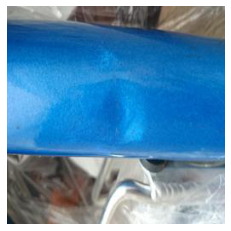

In [157]:
import ijson
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# 確認
images = {}
images_path=os.path.join(output_json_path, output_json_name)
with open(images_path, "rb") as f:
    for key, value in ijson.kvitems(f, "", use_float=True):
        images[key] = value

# エンコードされた文字列から画像可視化
keys = list(images.keys())
N = 200
print(f"total images: {len(keys)}")
print(keys[N])
# base64エンコードされた文字列データ
str_data1 = images[keys[N]]

# バイトデータにデコード
decoded_data1 = base64.urlsafe_b64decode(str_data1)

# デコードしたバイトデータをImageオブジェクトに変換
image1 = Image.open(BytesIO(decoded_data1))

# 1x1のsubplotを作成して、1枚の画像を表示
fig, axarr = plt.subplots(1, 1)

axarr.imshow(image1)
axarr.axis('off')  # 軸を非表示に

plt.show()

## ○○_instructions.jsonの作成

製品の違いを答えさせるタスク (製品に違いがない場合)

In [203]:
import random

# シード値を固定
random.seed(42)

def is_image_file(filename):
    return any(filename.lower().endswith(ext) for ext in ['.png', '.jpg', '.jpeg'])

def has_two_or_more_images(child_folders):
    # 合計画像枚数が2枚以上であることの確認
    total_images = 0
    for child_folder in child_folders:
        total_images += len([file for file in os.listdir(child_folder) if is_image_file(file)])
        if total_images >= 2:
            return True
    return False

def create_instructions_json(base_folder, output_json_path, NUM_PAIRS):
    data = {}
    instruction_id = 0
    # 親フォルダを順に走査
    parent_folders = sorted([f.path for f in os.scandir(base_folder) if f.is_dir()])
    for parent_folder in parent_folders:
        pairs = []
        child_folders = [f.path for f in os.scandir(parent_folder) if f.is_dir()]
        if has_two_or_more_images(child_folders):
            # 最大NUM_PAIRS回のペア形成を試みる
            for _ in range(NUM_PAIRS):
                pair = []
                for _ in range(2):  # 2枚の画像を選択
                    selected_image = None
                    image_key = None
                    # ランダムに子フォルダを選択
                    selected_child_folder = random.choice(child_folders)
                    images = [img for img in os.listdir(selected_child_folder) if is_image_file(img)]

                    # ランダムに画像を1枚選択
                    if images:
                        selected_image = random.choice(images)
                        image_key = f"{os.path.basename(parent_folder)}+{os.path.basename(selected_child_folder)}+{os.path.splitext(selected_image)[0]}"
                        pair.append(image_key)
                    else:
                        print(f"画像が見つかりませんでした: {selected_child_folder}")

                # 2枚の画像が異なる場合にのみペアを追加
                if len(pair) == 2 and pair[0] != pair[1]:
                    pairs.append(pair)

            # 重複を除去
            unique_pairs = [list(x) for x in set(tuple(x) for x in pairs)]

            # JSONデータに追加
            for pair in unique_pairs:
                data[f"SD_INS_{instruction_id}"] = {
                    "instruction": "", 
                    "answer": "", 
                    "image_ids": pair, 
                    "flag": "product_no"
                }
                instruction_id += 1

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": data}, json_file, indent=4, ensure_ascii=False)

# プログラムの実行
NUM_PAIRS = 20  # 1つの親フォルダに対して生成するペア数
output_json_name = "train_instructions.json"
create_instructions_json(base_image_folder, os.path.join(output_json_path, output_json_name), NUM_PAIRS)

instructionとanswerを埋める

In [220]:
instructions = [
    "Are there any differences between the products in these images?",
    "Do these images display distinct products?",
    "Is there a discrepancy between the items shown in these photographs?",
    "Are the products depicted here not identical?",
    "Can you identify any dissimilarities in these products?",
    "Are these two products not exactly the same?",
    "Is there any variance in the products shown in these pictures?",
    "Do the items in these images differ in any way?",
    "Are the products presented in these images not the same?",
    "Is there a divergence in the products seen in these pictures?",
    "Can any distinctions be observed between these two products?",
    "Are these two items dissimilar in any aspect?",
    "Do these images represent two different products?",
    "Are the products in these pictures not a perfect match?",
    "Is there any non-identical feature in the products shown here?", # 15
    "Are these two images of the same product?",
    "Is there no difference between the products in these images?",
    "Are the items shown in these photographs identical?",
    "Do these pictures depict the same product?",
    "Are these two products exactly alike?",
    "Is there no variation between the products in these images?",
    "Do the items in these images match perfectly?",
    "Are the products presented here the same?",
    "Is there no discrepancy in the products shown in these pictures?",
    "Do these two images show an identical product?",
    "Are the two products depicted here the same in every aspect?",
    "Do these pictures display the same item?",
    "Is there no distinct difference between the products in these images?",
    "Are these images representing the same product?",
    "Do these two products share complete similarity?",
]

instructions_ja = [
    "これらの画像の製品に違いはありますか？",
    "これらの画像は異なる製品を表示していますか？",
    "これらの写真に映っているアイテムに相違点はありますか？",
    "ここに描かれている製品は同一ではありませんか？",
    "これらの製品に何か相違点が見つけられますか？",
    "これらの2つの製品は完全に同じではありませんか？",
    "これらの写真に示されている製品に何か変化がありますか？",
    "これらの画像のアイテムに何か違いはありますか？",
    "これらの画像に提示されている製品は同じではありませんか？",
    "これらの写真に見られる製品に何か相違点がありますか？",
    "これらの2つの製品の間に区別が観察できますか？",
    "これらの2つのアイテムは何か点で異なりますか？",
    "これらの画像は2つの異なる製品を表していますか？",
    "これらの写真の製品は完全に一致していませんか？",
    "ここで示されている製品に同一ではない特徴がありますか？", # 15
    "これら2つの画像は同じ製品ですか？",
    "これらの画像の製品に違いはありませんか？",
    "これらの写真に映っているアイテムは同一ですか？",
    "これらの写真は同じ製品を描いていますか？",
    "これら2つの製品は全く同じですか？",
    "これらの画像の製品に変化はありませんか？",
    "これらの画像のアイテムは完全に一致していますか？",
    "ここに提示されている製品は同じですか？",
    "これらの写真に示されている製品に相違点はありませんか？",
    "これらの2つの画像は同一の製品を示していますか？",
    "ここに描かれている2つの製品はすべての面で同じですか？",
    "これらの写真は同じアイテムを表示していますか？",
    "これらの画像の製品に明確な違いはありませんか？",
    "これらの画像は同じ製品を表していますか？",
    "これらの2つの製品は完全に類似していますか？",
]

In [238]:
answers = [
    "No. Both images show the same product, {product_name}.",
    "No. Both images display the same product, {product_name}.",
    "No. The items in these photographs are identical and are both {product_name}.",
    "No. These products are identical, and both are {product_name}.",
    "No. There are no dissimilarities; both are {product_name}.",
    "No. These two products are exactly the same, both being {product_name}.",
    "No. There is no variance; both products are {product_name}.",
    "No. The items in these images are the same, both {product_name}.",
    "No. The products presented here are the same, both {product_name}.",
    "No. There is no divergence; both are the same product, {product_name}.",
    "No. No distinctions can be observed; both are {product_name}.",
    "No. These two items are similar in every aspect, both {product_name}.",
    "No. These images represent the same product, {product_name}.",
    "No. The products in these pictures match perfectly, both are {product_name}.",
    "No. There are no non-identical features; both are {product_name}.",
    "Yes. Both of these images are of the same product, {product_name}.",
    "Yes. There is no difference; both images show {product_name}.",
    "Yes. The items shown in these photographs are identical, both {product_name}.",
    "Yes. These pictures depict the same product, {product_name}.",
    "Yes. These two products are exactly alike, both {product_name}.",
    "Yes. There is no variation; both products are {product_name}.",
    "Yes. The items in these images match perfectly, both are {product_name}.",
    "Yes. The products presented here are the same, both {product_name}.",
    "Yes. There is no discrepancy; both products shown are {product_name}.",
    "Yes. These two images show an identical product, {product_name}.",
    "Yes. The two products depicted are the same in every aspect, both {product_name}.",
    "Yes. These pictures display the same item, {product_name}.",
    "Yes. There is no distinct difference; both products are {product_name}.",
    "Yes. These images represent the same product, {product_name}.",
    "Yes. These two products share complete similarity, both are {product_name}.",
]

answers_ja = [
    "いいえ。これらの画像はどちらも同じ製品、{product_name}を示しています。",
    "いいえ。これらの画像はどちらも同じ製品、{product_name}を表示しています。",
    "いいえ。これらの写真に映っているアイテムは同一で、どちらも{product_name}です。",
    "いいえ。これらの製品は同一で、どちらも{product_name}です。",
    "いいえ。相違点はありません。どちらも{product_name}です。",
    "いいえ。これら2つの製品は完全に同じで、どちらも{product_name}です。",
    "いいえ。変化はありません。どちらの製品も{product_name}です。",
    "いいえ。これらの画像のアイテムは同じで、どちらも{product_name}です。",
    "いいえ。ここに提示されている製品は同じで、どちらも{product_name}です。",
    "いいえ。相違点はありません。どちらも同じ製品、{product_name}です。",
    "いいえ。区別は観察されません。どちらも{product_name}です。",
    "いいえ。これらの2つのアイテムは全ての面で同様で、どちらも{product_name}です。",
    "いいえ。これらの画像は同じ製品、{product_name}を表しています。",
    "いいえ。これらの写真の製品は完全に一致しており、どちらも{product_name}です。",
    "いいえ。同一ではない特徴はありません。どちらも{product_name}です。",
    "はい。これら2つの画像はどちらも同じ製品、{product_name}です。",
    "はい。違いはありません。これらの画像はどちらも{product_name}を示しています。",
    "はい。これらの写真に映っているアイテムは同一で、どちらも{product_name}です。",
    "はい。これらの写真は同じ製品、{product_name}を描いています。",
    "はい。これら2つの製品は全く同じで、どちらも{product_name}です。",
    "はい。変化はありません。どちらの製品も{product_name}です。",
    "はい。これらの画像のアイテムは完全に一致しており、どちらも{product_name}です。",
    "はい。ここに提示されている製品は同じで、どちらも{product_name}です。",
    "はい。相違点はありません。示されている製品はどちらも{product_name}です。",
    "はい。これらの2つの画像は同一の製品、{product_name}を示しています。",
    "はい。ここに描かれている2つの製品はすべての面で同じで、どちらも{product_name}です。",
    "はい。これらの写真は同じアイテム、{product_name}を表示しています。",
    "はい。明確な違いはありません。どちらの製品も{product_name}です。",
    "はい。これらの画像は同じ製品、{product_name}を表しています。",
    "はい。これら2つの製品は完全に類似しており、どちらも{product_name}です。",
]

In [239]:
import json
import random

def fill_instructions_and_answers(output_json_path, instructions, answers):
    # JSONファイルを読み込む
    with open(output_json_path, "r", encoding="utf-8") as json_file:
        data = json.load(json_file)["data"]

    # "flag"が"product_no"の項目だけを処理する
    for key, value in data.items():
        if value["flag"] == "product_no":
            # "image_ids"の親フォルダ名が一致するか確認
            parent_folders = [image_id.split('+')[0].replace("_", " ") for image_id in value["image_ids"]]
            if parent_folders[0] == parent_folders[1]:
                # instructions と answers からランダムに選択
                question_index = random.randint(0, len(instructions) - 1)
                value["instruction"] = instructions[question_index]
                value["answer"] = answers[question_index].format(product_name=parent_folders[0])
            else:
                print(f"Error: Image IDs in {key} do not have matching parent folder names.")
                break

    # 更新されたJSONデータをファイルに書き出す
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": data}, json_file, indent=4, ensure_ascii=False)

# 使用例
fill_instructions_and_answers(os.path.join(output_json_path, output_json_name), instructions, answers)

製品の違いを答えさせるタスク (製品に違いがある場合)

In [204]:
# シード値を固定
random.seed(42)

def is_image_file(filename):
    return any(filename.lower().endswith(ext) for ext in ['.png', '.jpg', '.jpeg'])

def load_existing_json(json_path):
    """既存のJSONファイルを読み込み、次のinstruction_idと目標カウントを決定する"""
    with open(json_path, "r", encoding="utf-8") as json_file:
        data = json.load(json_file)["data"]
        last_instruction_id = max([int(key.split("_")[-1]) for key in data.keys()], default=0)
        target_count = sum(1 for item in data.values() if item.get("flag") == "product_no")
        return data, last_instruction_id+1, target_count

def create_instructions_json(base_folder, json_path):
    # 既存のJSONファイルからデータを読み込み
    existing_data, next_instruction_id, target_count = load_existing_json(json_path)
    parent_folders = [f.path for f in os.scandir(base_folder) if f.is_dir()]
    for _ in range(target_count):
        # 親フォルダをランダムに2つ選択
        selected_parents = random.sample(parent_folders, 2)
        pair = []

        for parent_folder in selected_parents:
            child_folders = [f.path for f in os.scandir(parent_folder) if f.is_dir()]
            if child_folders:
                # 子フォルダをランダムに1つ選択
                selected_child_folder = random.choice(child_folders)
                images = [img for img in os.listdir(selected_child_folder) if is_image_file(img)]

                # ランダムに画像を1枚選択
                if images:
                    selected_image = random.choice(images)
                    image_key = f"{os.path.basename(parent_folder)}+{os.path.basename(selected_child_folder)}+{os.path.splitext(selected_image)[0]}"
                    pair.append(image_key)
                else:
                    print(f"画像が見つかりませんでした: {selected_child_folder}")

        # 2枚の画像が選ばれた場合、JSONデータに追加
        if len(pair) == 2 and pair[0] != pair[1]:
            existing_data[f"SD_INS_{next_instruction_id}"] = {
                "instruction": "",
                "answer": "",
                "image_ids": pair,
                "flag": "product_yes"
            }
            next_instruction_id += 1

    # JSONをファイルに書き出し（追記モード）
    with open(json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": existing_data}, json_file, indent=4, ensure_ascii=False)
        
# プログラムの実行
create_instructions_json(base_image_folder, os.path.join(output_json_path, output_json_name))

instructionとanswerを埋める

In [ ]:
instructions_ja = [
    "これらの画像の製品に違いはありますか？",
    "これらの画像は異なる製品を表示していますか？",
    "これらの写真に映っているアイテムに相違点はありますか？",
    "ここに描かれている製品は同一ではありませんか？",
    "これらの製品に何か相違点が見つけられますか？",
    "これらの2つの製品は完全に同じではありませんか？",
    "これらの写真に示されている製品に何か変化がありますか？",
    "これらの画像のアイテムに何か違いはありますか？",
    "これらの画像に提示されている製品は同じではありませんか？",
    "これらの写真に見られる製品に何か相違点がありますか？",
    "これらの2つの製品の間に区別が観察できますか？",
    "これらの2つのアイテムは何か点で異なりますか？",
    "これらの画像は2つの異なる製品を表していますか？",
    "これらの写真の製品は完全に一致していませんか？",
    "ここで示されている製品に同一ではない特徴がありますか？", # 15
    "これら2つの画像は同じ製品ですか？",
    "これらの画像の製品に違いはありませんか？",
    "これらの写真に映っているアイテムは同一ですか？",
    "これらの写真は同じ製品を描いていますか？",
    "これら2つの製品は全く同じですか？",
    "これらの画像の製品に変化はありませんか？",
    "これらの画像のアイテムは完全に一致していますか？",
    "ここに提示されている製品は同じですか？",
    "これらの写真に示されている製品に相違点はありませんか？",
    "これらの2つの画像は同一の製品を示していますか？",
    "ここに描かれている2つの製品はすべての面で同じですか？",
    "これらの写真は同じアイテムを表示していますか？",
    "これらの画像の製品に明確な違いはありませんか？",
    "これらの画像は同じ製品を表していますか？",
    "これらの2つの製品は完全に類似していますか？",
]

In [240]:
answers = [
    "Yes. The first image shows {product_name1}, while the second image displays {product_name2}.",
    "Yes. Image A is {product_name1}, and Image B is {product_name2}.",
    "Yes. In the left image, we have {product_name1}, and in the right image, it's {product_name2}.",
    "Yes. The product in the first picture is {product_name1}, whereas the second picture shows {product_name2}.",
    "Yes. The item in the first image is {product_name1}, and in the second image, it's {product_name2}.",
    "Yes. On the left side, the product is {product_name1}, and on the right, it's {product_name2}.",
    "Yes. The first picture presents {product_name1}, while the second presents {product_name2}.",
    "Yes. In image A, you see {product_name1}, and in image B, there's {product_name2}.",
    "Yes. The left picture shows {product_name1}, and the right picture shows {product_name2}.",
    "Yes. Picture A contains {product_name1}, and Picture B contains {product_name2}.",
    "Yes. The first one is {product_name1}, and the second is {product_name2}.",
    "Yes. Image on the left is {product_name1}, and on the right is {product_name2}.",
    "Yes. First, we have {product_name1}, and second, we have {product_name2}.",
    "Yes. The left one is {product_name1}, and the right one is {product_name2}.",
    "Yes. Initially, {product_name1} is shown, followed by {product_name2}.", # 15
    "No. The first image is {product_name1}, while the second image is {product_name2}.",
    "No. Image A shows {product_name1}, and Image B shows {product_name2}.",
    "No. The left image contains {product_name1}, and the right image contains {product_name2}.",
    "No. In the first picture, we have {product_name1}, and in the second picture, {product_name2}.",
    "No. The first image's product is {product_name1}, and the second's is {product_name2}.",
    "No. On the left is {product_name1}, and on the right is {product_name2}.",
    "No. The first picture depicts {product_name1}, and the second depicts {product_name2}.",
    "No. In image A, it's {product_name1}, and in image B, it's {product_name2}.",
    "No. The left picture has {product_name1}, and the right picture has {product_name2}.",
    "No. Picture A represents {product_name1}, and Picture B represents {product_name2}.",
    "No. The first product is {product_name1}, and the second is {product_name2}.",
    "No. The left side shows {product_name1}, and the right side shows {product_name2}.",
    "No. The first is {product_name1}, and the second is {product_name2}.",
    "No. The left product is {product_name1}, and the right product is {product_name2}.",
    "No. Initially, we see {product_name1}, followed by {product_name2}.",
]

answers_ja = [
    "はい。一枚目の画像は{product_name1}で、二枚目の画像は{product_name2}です。",
    "はい。画像Aは{product_name1}、画像Bは{product_name2}です。",
    "はい。左の画像には{product_name1}があり、右の画像には{product_name2}があります。",
    "はい。最初の写真には{product_name1}が、二番目の写真には{product_name2}があります。",
    "はい。最初の画像には{product_name1}が、二番目の画像には{product_name2}があります。",
    "はい。左側には{product_name1}が、右側には{product_name2}があります。",
    "はい。最初の写真は{product_name1}を、二番目の写真は{product_name2}を提示しています。",
    "はい。画像Aには{product_name1}が、画像Bには{product_name2}があります。",
    "はい。左の写真には{product_name1}が、右の写真には{product_name2}があります。",
    "はい。写真Aには{product_name1}が、写真Bには{product_name2}があります。",
    "はい。最初の製品は{product_name1}で、二番目の製品は{product_name2}です。",
    "はい。左側の画像は{product_name1}で、右側の画像は{product_name2}です。",
    "はい。最初に{product_name1}が、その後に{product_name2}があります。",
    "はい。左側の製品は{product_name1}で、右側の製品は{product_name2}です。",
    "はい。最初に{product_name1}が示され、その後に{product_name2}が示されます。", # 15
    "いいえ。一枚目の画像は{product_name1}で、二枚目の画像は{product_name2}です。",
    "いいえ。画像Aは{product_name1}で、画像Bは{product_name2}です。",
    "いいえ。左の画像には{product_name1}が、右の画像には{product_name2}があります。",
    "いいえ。最初の写真には{product_name1}が、二番目の写真には{product_name2}があります。",
    "いいえ。最初の画像の製品は{product_name1}で、二番目の画像の製品は{product_name2}です。",
    "いいえ。左側は{product_name1}で、右側は{product_name2}です。",
    "いいえ。最初の写真は{product_name1}を、二番目の写真は{product_name2}を描写しています。",
    "いいえ。画像Aには{product_name1}が、画像Bには{product_name2}があります。",
    "いいえ。左の写真には{product_name1}が、右の写真には{product_name2}があります。",
    "いいえ。写真Aは{product_name1}を、写真Bは{product_name2}を表しています。",
    "いいえ。最初の製品は{product_name1}で、二番目の製品は{product_name2}です。",
    "いいえ。左側の画像は{product_name1}で、右側の画像は{product_name2}です。",
    "いいえ。最初は{product_name1}で、二番目は{product_name2}です。",
    "いいえ。左側の製品は{product_name1}で、右側の製品は{product_name2}です。",
    "いいえ。最初に{product_name1}が見られ、その後に{product_name2}が続きます。",
]

In [241]:
import json
import random

def fill_instructions_and_answers(output_json_path, instructions, answers):
    # JSONファイルを読み込む
    with open(output_json_path, "r", encoding="utf-8") as json_file:
        data = json.load(json_file)["data"]

    # "flag"が"product_yes"の項目だけを処理する
    for key, value in data.items():
        if value["flag"] == "product_yes":
            # "image_ids"の親フォルダ名が異なるか確認
            parent_folders = [image_id.split('+')[0].replace("_", " ") for image_id in value["image_ids"]]
            if parent_folders[0] != parent_folders[1]:
                # instructions と answers からランダムに選択
                question_index = random.randint(0, len(instructions) - 1)
                value["instruction"] = instructions[question_index]
                value["answer"] = answers[question_index].format(product_name1=parent_folders[0], product_name2=parent_folders[1])
            else:
                print(f"Error: Image IDs in {key} have matching parent folder names.")
                break

    # 更新されたJSONデータをファイルに書き出す
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": data}, json_file, indent=4, ensure_ascii=False)

# 使用例
fill_instructions_and_answers(os.path.join(output_json_path, output_json_name), instructions, answers)

確認

In [7]:
def count_flags_in_json(json_path):
    """JSONファイルを読み込み、'product_no' と 'product_yes' の各フラグの合計をカウントする"""
    with open(json_path, "r", encoding="utf-8") as json_file:
        data = json.load(json_file)["data"]
        count_no = sum(1 for item in data.values() if item.get("flag") == "product_no")
        count_yes = sum(1 for item in data.values() if item.get("flag") == "product_yes")
    print(f"product_no: {count_no}")
    print(f"product_yes: {count_yes}")
    return count_no, count_yes

# JSONファイルのパスを指定して関数を実行
product_no, product_yes = count_flags_in_json(os.path.join(output_json_path, output_json_name))

product_no: 6440
product_yes: 6440


同一製品に対して、外観的欠陥の有無の違いを答えさせるタスク (違いがない場合)

In [206]:
def create_instructions_json(base_folder, output_json_path, NUM_PAIRS):
    existing_data, next_instruction_id, _ = load_existing_json(output_json_path)

    # 親フォルダを順に走査
    parent_folders = sorted([f.path for f in os.scandir(base_folder) if f.is_dir()])
    for parent_folder in parent_folders:
        child_folders = sorted([f.path for f in os.scandir(parent_folder) if f.is_dir()])

        for child_folder in child_folders:
            images = [img for img in os.listdir(child_folder) if is_image_file(img)]
            pairs = []

            if os.path.basename(child_folder).lower() == "none" and len(images) >= 2:
                # "None"フォルダから2枚選択
                for _ in range(NUM_PAIRS):
                    selected_images = random.sample(images, 2)
                    pair = [f"{os.path.basename(parent_folder)}+None+{os.path.splitext(img)[0]}" for img in selected_images]
                    pairs.append(pair)
            elif len(images) >= 1:
                # "None"以外のフォルダから1枚選択、別のフォルダからもう1枚選択
                for _ in range(NUM_PAIRS):
                    selected_image = random.choice(images)
                    first_image_key = f"{os.path.basename(parent_folder)}+{os.path.basename(child_folder)}+{os.path.splitext(selected_image)[0]}"

                    other_child_folders = [f for f in child_folders if os.path.basename(f).lower() != "none"]
                    if other_child_folders:
                        other_folder = random.choice(other_child_folders)
                        other_images = [img for img in os.listdir(other_folder) if is_image_file(img)]
                        if other_images:
                            selected_other_image = random.choice(other_images)
                            second_image_key = f"{os.path.basename(parent_folder)}+{os.path.basename(other_folder)}+{os.path.splitext(selected_other_image)[0]}"
                            pair = [first_image_key, second_image_key]
                            if pair[0] != pair[1]:
                                pairs.append(pair)

            # 重複を除去
            unique_pairs = [list(x) for x in set(tuple(x) for x in pairs)]

            # JSONデータに追加
            for pair in unique_pairs:
                existing_data[f"SD_INS_{next_instruction_id}"] = {
                    "instruction": "",
                    "answer": "",
                    "image_ids": pair,
                    "flag": "existence_same_no"
                }
                next_instruction_id += 1

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": existing_data}, json_file, indent=4, ensure_ascii=False)
        
# プログラムの実行
NUM_PAIRS = 11  # 1つの子フォルダに対して生成するペア数
create_instructions_json(base_folder, os.path.join(output_json_path, output_json_name), NUM_PAIRS)

instructionとanswerを埋める

In [ ]:
instructions = [
    
]

同一製品に対して、外観的欠陥の有無の違いを答えさせるタスク (違いがある場合)

In [207]:
def create_instructions_json(base_folder, output_json_path, NUM_PAIRS):
    existing_data, next_instruction_id, _ = load_existing_json(output_json_path)

    # 親フォルダを順に走査
    parent_folders = sorted([f.path for f in os.scandir(base_folder) if f.is_dir()])
    for parent_folder in parent_folders:
        child_folders = sorted([f.path for f in os.scandir(parent_folder) if f.is_dir()])
        none_folder = [f for f in child_folders if os.path.basename(f).lower() == "none"]
        other_folders = [f for f in child_folders if os.path.basename(f).lower() != "none"]

        if none_folder and len(child_folders) > 1:
            none_folder = none_folder[0]
            none_images = [img for img in os.listdir(none_folder) if is_image_file(img)]

            if len(none_images) >= 1:
                for other_folder in other_folders:
                    other_images = [img for img in os.listdir(other_folder) if is_image_file(img)]
                    pairs = []

                    if len(other_images) >= 1:
                        # 最大NUM_PAIRS回のペア形成を試みる
                        for _ in range(NUM_PAIRS):
                            selected_none_image = random.choice(none_images)
                            selected_other_image = random.choice(other_images)
                            pair = [
                                f"{os.path.basename(parent_folder)}+{os.path.basename(none_folder)}+{os.path.splitext(selected_none_image)[0]}",
                                f"{os.path.basename(parent_folder)}+{os.path.basename(other_folder)}+{os.path.splitext(selected_other_image)[0]}"
                            ]
                            random.shuffle(pair)
                            pairs.append(pair)

                        # 重複を除去
                        unique_pairs = [list(x) for x in set(tuple(x) for x in pairs)]

                        # JSONデータに追加
                        for pair in unique_pairs:
                            existing_data[f"SD_INS_{next_instruction_id}"] = {
                                "instruction": "",
                                "answer": "",
                                "image_ids": pair,
                                "flag": "existence_same_yes"
                            }
                            next_instruction_id += 1

    # JSONをファイルに書き出し（追記モード）
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": existing_data}, json_file, indent=4, ensure_ascii=False)

# プログラムの実行に必要なパラメータを設定する
NUM_PAIRS = 12  # 1つの子フォルダに対して生成するペア数
create_instructions_json(base_folder, os.path.join(output_json_path, output_json_name), NUM_PAIRS)

instructionとanswerを埋める

確認

In [208]:
def count_flags_in_json(json_path):
    """JSONファイルを読み込み、'product_no' と 'product_yes' の各フラグの合計をカウントする"""
    with open(json_path, "r", encoding="utf-8") as json_file:
        data = json.load(json_file)["data"]
        count_no = sum(1 for item in data.values() if item.get("flag") == "existence_same_no")
        count_yes = sum(1 for item in data.values() if item.get("flag") == "existence_same_yes")
    print(f"existence_same_no: {count_no}")
    print(f"existence_same_yes: {count_yes}")
    return count_no, count_yes

# JSONファイルのパスを指定して関数を実行
existence_same_no, existence_same_yes = count_flags_in_json(os.path.join(output_json_path, output_json_name))

existence_same_no: 6590
existence_same_yes: 6382


同一製品に対して、外観的欠陥のモードの違いを答えさせるタスク (違いがない場合)

In [209]:
def create_instructions_json(base_folder, output_json_path, NUM_PAIRS):
    existing_data, next_instruction_id, _ = load_existing_json(output_json_path)

    # 親フォルダを順に走査
    parent_folders = sorted([f.path for f in os.scandir(base_folder) if f.is_dir()])
    for parent_folder in parent_folders:
        child_folders = sorted([f.path for f in os.scandir(parent_folder) if f.is_dir() and os.path.basename(f).lower() != "none"])
        
        for child_folder in child_folders:
            images = [img for img in os.listdir(child_folder) if is_image_file(img)]
            pairs = []

            if len(images) >= 2:
                # 最大NUM_PAIRS回のペア形成を試みる
                for _ in range(NUM_PAIRS):
                    selected_images = random.sample(images, 2)
                    pair = [f"{os.path.basename(parent_folder)}+{os.path.basename(child_folder)}+{os.path.splitext(img)[0]}" for img in selected_images]
                    pairs.append(pair)

            # 重複を除去
            unique_pairs = [list(x) for x in set(tuple(x) for x in pairs)]

            # JSONデータに追加
            for pair in unique_pairs:
                existing_data[f"SD_INS_{next_instruction_id}"] = {
                    "instruction": "",
                    "answer": "",
                    "image_ids": pair,
                    "flag": "mode_same_no"
                }
                next_instruction_id += 1

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": existing_data}, json_file, indent=4, ensure_ascii=False)

# プログラムの実行に必要なパラメータを設定する
NUM_PAIRS = 20  # 1つの子フォルダに対して生成するペア数
create_instructions_json(base_folder, os.path.join(output_json_path, output_json_name), NUM_PAIRS)

instructionとanswerを埋める

In [8]:
instructions = [
    "Do these {product} images display different defect_modes?",
    "In both {product} pictures, is there a variation in defect types?",
    "Are the defects in these two {product} images varied?",
    "For these {product} pictures, do the fault modes differ?",
    "In these {product} photos, are the flaws manifested differently?",
    "Do these {product} images exhibit diverse defect_modes?",
    "Are the defect modes in both {product} pictures distinct?",
    "In these two {product} images, is there a discrepancy in defect types?",
    "Do these {product} photos show varied defects?",
    "Are the types of defects in these {product} images different?",
    "For these two {product} pictures, do the fault modes vary?",
    "In both {product} images, are the flaws displayed differently?",
    "Do these {product} pictures reveal distinct defect modes?",
    "Are the defect modes in these {product} photos different?",
    "In these {product} images, are the faults diverse?", # 15
    "Are the defect modes in these {product} photos identical?", 
    "In both {product} images, is the defect type the same?",
    "Do these {product} pictures exhibit the same defect mode?",
    "Are the defects in these two {product} photos the same?",
    "For these {product} images, are the faults manifested in the same way?",
    "Is there uniformity in the defect modes across both {product} pictures?",
    "Do these {product} photos display the same types of defects?",
    "Are the defect modes in these two {product} images the same?",
    "In these {product} pictures, are the flaws the same?",
    "Do both {product} images show the same defect modes?",
    "For these {product} photos, are the types of defects identical?",
    "Are the defects in these {product} images the same in nature?",
    "In these two {product} pictures, are the defect modes identical?",
    "Do these {product} images reveal the same defects?",
    "Are the defect modes in both {product} photos the same?",
]

instructions_ja = [
    "これらの{product}の画像では、不良モードに違いはありますか？",
    "これらの{product}の写真の中で、不良の種類にバリエーションはありますか？",
    "これら2枚の{product}の画像には、異なる不良がありますか？",
    "これらの{product}の写真では、欠陥モードが異なりますか？",
    "これらの{product}の写真において、欠陥は異なる方法で表れていますか？",
    "これらの{product}の画像間で、欠陥モードに多様性はありますか？",
    "両方の{product}の写真において、欠陥モードは異なりますか？",
    "これら2枚の{product}の画像では、欠陥の種類に違いはありますか？",
    "これらの{product}の写真では、異なる欠陥が示されていますか？",
    "これらの{product}の画像では、欠陥の種類が異なりますか？",
    "これら2枚の{product}の写真では、欠陥モードが異なりますか？",
    "両方の{product}の画像では、欠陥が異なる方法で表示されていますか？",
    "これらの{product}の写真では、異なる欠陥モードが示されていますか？",
    "これらの{product}の写真において、欠陥モードは異なりますか？",
    "これらの{product}の画像において、欠陥は多様ですか？", # 15
    "これらの{product}の写真の欠陥モードは同一ですか？",
    "両方の{product}の画像において、不良の種類は同じですか？",
    "これらの{product}の写真では、同じ欠陥モードが示されていますか？",
    "これら2枚の{product}の写真において、欠陥は同じですか？",
    "これらの{product}の画像では、欠陥は同じ方法で表れていますか？",
    "両方の{product}の写真において、欠陥モードに一貫性はありますか？",
    "これらの{product}の写真では、同じ種類の欠陥が表示されていますか？",
    "これら2枚の{product}の画像では、欠陥モードは同じですか？",
    "これらの{product}の写真では、欠陥は同じですか？",
    "両方の{product}の画像では、同じ欠陥モードが示されていますか？",
    "これらの{product}の写真では、欠陥の種類は同一ですか？",
    "これらの{product}の画像において、欠陥は同じ性質ですか？",
    "これら2枚の{product}の写真において、欠陥モードは同一ですか？",
    "これらの{product}の画像では、同じ欠陥が明らかにされていますか？",
    "両方の{product}の写真において、欠陥モードは同じですか？",
]

In [ ]:
answers = [
    "No. The defect modes in these {product} photos are both {defect_mode}.",
    "No. In both {product} images, the defect type is {defect_mode}.",
    "No. These {product} pictures exhibit the {defect_mode}.",
    "No. The defects in these two {product} photos are {defect_mode}.",
    "No. For these {product} images, the faults are manifested as {defect_mode}.",
    "No. There is uniformity in the defect modes across both {product} pictures, which is {defect_mode}.",
    "No. These {product} photos display the {defect_mode}.",
    "No. The defect modes in these two {product} images are {defect_mode}.",
    "No. In these {product} pictures, the flaws are {defect_mode}.",
    "No. Both {product} images show the {defect_mode}.",
    "No. For these {product} photos, the types of defects are {defect_mode}.",
    "No. The defects in these {product} images are {defect_mode} in nature.",
    "No. In these two {product} pictures, the defect modes are {defect_mode}.",
    "No. These {product} images reveal the {defect_mode}.",
    "No. The defect modes in both {product} photos are {defect_mode}.",
    "Yes. Both of these {product} images display the {defect_mode}.",
    "Yes. In both {product} pictures, the defect type is {defect_mode}.",
    "Yes. The defects in these two {product} images are {defect_mode}.",
    "Yes. For these {product} pictures, the fault modes are {defect_mode}.",
    "Yes. In these {product} photos, the flaws are manifested as {defect_mode}.",
    "Yes. These {product} images exhibit the {defect_mode}.",
    "Yes. The defect modes in both {product} pictures are {defect_mode}.",
    "Yes. In these two {product} images, the defect types are {defect_mode}.",
    "Yes. These {product} photos show the {defect_mode}.",
    "Yes. The types of defects in these {product} images are {defect_mode}.",
    "Yes. For these two {product} pictures, the fault modes are {defect_mode}.",
    "Yes. In both {product} images, the flaws are {defect_mode}.",
    "Yes. These {product} pictures reveal the {defect_mode}.",
    "Yes. The defect modes in these {product} photos are {defect_mode}.",
    "Yes. In these {product} images, the faults are {defect_mode}.",
]

answers_ja = [
    
]

同一製品に対して、外観的欠陥のモードの違いを答えさせるタスク (違いがある場合)

In [210]:
def create_instructions_json(base_folder, output_json_path, NUM_PAIRS):
    existing_data, next_instruction_id, _ = load_existing_json(output_json_path)

    # 親フォルダを順に走査
    parent_folders = sorted([f.path for f in os.scandir(base_folder) if f.is_dir()])
    for parent_folder in parent_folders:
        pairs = []
        child_folders = sorted([f.path for f in os.scandir(parent_folder) if f.is_dir() and os.path.basename(f).lower() != "none"])
        
        if len(child_folders) >= 2:
            for _ in range(NUM_PAIRS):
                selected_child_folders = random.sample(child_folders, 2)
                pair = []
                for child_folder in selected_child_folders:
                    images = [img for img in os.listdir(child_folder) if is_image_file(img)]
                    if images:
                        selected_image = random.choice(images)
                        image_key = f"{os.path.basename(parent_folder)}+{os.path.basename(child_folder)}+{os.path.splitext(selected_image)[0]}"
                        pair.append(image_key)
                pairs.append(pair)

            # 重複を除去
            unique_pairs = [list(x) for x in set(tuple(x) for x in pairs)]
            
            # JSONデータに追加
            for pair in unique_pairs:
                existing_data[f"SD_INS_{next_instruction_id}"] = {
                    "instruction": "",
                    "answer": "",
                    "image_ids": pair,
                    "flag": "mode_same_yes"
                }
                next_instruction_id += 1

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": existing_data}, json_file, indent=4, ensure_ascii=False)

# プログラムの実行に必要なパラメータを設定する
NUM_PAIRS = 40  # 1つの親フォルダに対して生成するペア数
create_instructions_json(base_folder, os.path.join(output_json_path, output_json_name), NUM_PAIRS)

instructionとanswerを埋める

確認

In [211]:
def count_flags_in_json(json_path):
    """JSONファイルを読み込み、'product_no' と 'product_yes' の各フラグの合計をカウントする"""
    with open(json_path, "r", encoding="utf-8") as json_file:
        data = json.load(json_file)["data"]
        count_no = sum(1 for item in data.values() if item.get("flag") == "mode_same_no")
        count_yes = sum(1 for item in data.values() if item.get("flag") == "mode_same_yes")
    print(f"mode_same_no: {count_no}")
    print(f"mode_same_yes: {count_yes}")
    return count_no, count_yes

# JSONファイルのパスを指定して関数を実行
mode_same_no, mode_same_yes = count_flags_in_json(os.path.join(output_json_path, output_json_name))

mode_same_no: 6279
mode_same_yes: 4468


異なる製品に対して、外観的欠陥の有無の違いを答えさせるタスク (違いがない場合)

In [212]:
def create_instructions_json(base_folder, output_json_path, NUM_PAIRS):
    existing_data, next_instruction_id, _ = load_existing_json(output_json_path)

    # 親フォルダをランダムに選択
    parent_folders = [f.path for f in os.scandir(base_folder) if f.is_dir()]
    pairs = []

    for _ in range(NUM_PAIRS):
        # 最初の親フォルダと子フォルダをランダムに選択
        parent_folder_1 = random.choice(parent_folders)
        child_folders_1 = [f.path for f in os.scandir(parent_folder_1) if f.is_dir()]
        if child_folders_1:
            child_folder_1 = random.choice(child_folders_1)
            images_1 = [img for img in os.listdir(child_folder_1) if is_image_file(img)]
            if images_1:
                selected_image_1 = random.choice(images_1)
                first_image_key = f"{os.path.basename(parent_folder_1)}+{os.path.basename(child_folder_1)}+{os.path.splitext(selected_image_1)[0]}"

                # 2番目の親フォルダと子フォルダを選択
                if os.path.basename(child_folder_1).lower() == "none":
                    # "None"フォルダがある異なる親フォルダを選択
                    while True:
                        parent_folder_2 = random.choice(parent_folders)
                        if parent_folder_2 != parent_folder_1:
                            child_folders_2 = [f.path for f in os.scandir(parent_folder_2) if f.is_dir() and os.path.basename(f).lower() == "none"]
                            if child_folders_2:
                                break
                else:
                    # "None"以外の子フォルダがある異なる親フォルダを選択
                    while True:
                        parent_folder_2 = random.choice(parent_folders)
                        if parent_folder_2 != parent_folder_1:
                            child_folders_2 = [f.path for f in os.scandir(parent_folder_2) if f.is_dir() and os.path.basename(f).lower() != "none"]
                            if child_folders_2:
                                break
                            
                child_folder_2 = random.choice(child_folders_2)
                images_2 = [img for img in os.listdir(child_folder_2) if is_image_file(img)]
                if images_2:
                    selected_image_2 = random.choice(images_2)
                    second_image_key = f"{os.path.basename(parent_folder_2)}+{os.path.basename(child_folder_2)}+{os.path.splitext(selected_image_2)[0]}"
                    pair = [first_image_key, second_image_key]
                    if pair[0] != pair[1]:
                        pairs.append(pair)

    # 重複を除去
    unique_pairs = [list(x) for x in set(tuple(x) for x in pairs)]

    # JSONデータに追加
    for pair in unique_pairs:
        existing_data[f"SD_INS_{next_instruction_id}"] = {
            "instruction": "",
            "answer": "",
            "image_ids": pair,
            "flag": "existence_different_no"
        }
        next_instruction_id += 1

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": existing_data}, json_file, indent=4, ensure_ascii=False)

# プログラムの実行に必要なパラメータを設定する
NUM_PAIRS = existence_same_no  # 生成するペア数
create_instructions_json(base_folder, os.path.join(output_json_path, output_json_name), NUM_PAIRS)

instructionとanswerを埋める

異なる製品に対して、外観的欠陥の有無の違いを答えさせるタスク (違いがある場合)

In [213]:
def create_instructions_json(base_folder, output_json_path, NUM_PAIRS):
    existing_data, next_instruction_id, _ = load_existing_json(output_json_path)

    # 親フォルダ
    parent_folders = [f.path for f in os.scandir(base_folder) if f.is_dir()]
    pairs = []

    for _ in range(NUM_PAIRS):
        # "None"フォルダがある親フォルダをランダムに選択
        parent_folder_none = random.choice(parent_folders)
        child_folders_none = [f.path for f in os.scandir(parent_folder_none) if f.is_dir() and os.path.basename(f).lower() == "none"]
        if not child_folders_none:
            continue

        none_folder = child_folders_none[0]
        none_images = [img for img in os.listdir(none_folder) if is_image_file(img)]
        if none_images:
            selected_none_image = random.choice(none_images)
            none_image_key = f"{os.path.basename(parent_folder_none)}+None+{os.path.splitext(selected_none_image)[0]}"

            # "None"以外の子フォルダがある異なる親フォルダをランダムに選択
            parent_folder_other = random.choice(parent_folders)
            child_folders_other = [f.path for f in os.scandir(parent_folder_other) if f.is_dir() and os.path.basename(f).lower() != "none"]
            if not child_folders_other:
                continue

            other_folder = random.choice(child_folders_other)
            other_images = [img for img in os.listdir(other_folder) if is_image_file(img)]
            if other_images:
                selected_other_image = random.choice(other_images)
                other_image_key = f"{os.path.basename(parent_folder_other)}+{os.path.basename(other_folder)}+{os.path.splitext(selected_other_image)[0]}"
                pair = [none_image_key, other_image_key]
                random.shuffle(pair)
                # 2枚の画像が選ばれた場合、ペアリストに追加
                if len(pair) == 2:
                    pairs.append(pair)

    # 重複を除去
    unique_pairs = [list(x) for x in set(tuple(x) for x in pairs)]
    
    # JSONデータに追加
    for pair in unique_pairs:
        existing_data[f"SD_INS_{next_instruction_id}"] = {
            "instruction": "",
            "answer": "",
            "image_ids": pair,
            "flag": "existence_different_yes"
        }
        next_instruction_id += 1

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": existing_data}, json_file, indent=4, ensure_ascii=False)

# プログラムの実行に必要なパラメータを設定する
NUM_PAIRS = existence_same_yes  # 1つの親フォルダに対して生成するペア数
create_instructions_json(base_folder, os.path.join(output_json_path, output_json_name), NUM_PAIRS)

instructionとanswerを埋める

確認

In [214]:
def count_flags_in_json(json_path):
    """JSONファイルを読み込み、'product_no' と 'product_yes' の各フラグの合計をカウントする"""
    with open(json_path, "r", encoding="utf-8") as json_file:
        data = json.load(json_file)["data"]
        count_no = sum(1 for item in data.values() if item.get("flag") == "existence_different_no")
        count_yes = sum(1 for item in data.values() if item.get("flag") == "existence_different_yes")
    print(f"existence_different_no: {count_no}")
    print(f"existence_different_yes: {count_yes}")
    return count_no, count_yes

# JSONファイルのパスを指定して関数を実行
existence_different_no, existence_different_yes = count_flags_in_json(os.path.join(output_json_path, output_json_name))

existence_different_no: 6577
existence_different_yes: 6038


異なる製品に対して、外観的欠陥のモードの違いを答えさせるタスク (違いがない場合)

In [215]:
def create_instructions_json(base_folder, output_json_path, NUM_PAIRS):
    existing_data, next_instruction_id, _ = load_existing_json(output_json_path)

    # 親フォルダ
    parent_folders = [f.path for f in os.scandir(base_folder) if f.is_dir()]
    pairs = []

    while len(pairs) < NUM_PAIRS:
        # 最初の親フォルダと子フォルダをランダムに選択
        parent_folder_1 = random.choice(parent_folders)
        child_folders_1 = [f.path for f in os.scandir(parent_folder_1) if f.is_dir() and os.path.basename(f).lower() != "none"]
        if child_folders_1:
            child_folder_1 = random.choice(child_folders_1)
            images_1 = [img for img in os.listdir(child_folder_1) if is_image_file(img)]
            if images_1:
                selected_image_1 = random.choice(images_1)
                first_image_key = f"{os.path.basename(parent_folder_1)}+{os.path.basename(child_folder_1)}+{os.path.splitext(selected_image_1)[0]}"

                # 同じ名前の子フォルダがある他の親フォルダを探す
                other_parent_folders = [pf for pf in parent_folders if pf != parent_folder_1 and os.path.exists(os.path.join(pf, os.path.basename(child_folder_1)))]
                if other_parent_folders:
                    parent_folder_2 = random.choice(other_parent_folders)
                    child_folder_2 = os.path.join(parent_folder_2, os.path.basename(child_folder_1))
                    images_2 = [img for img in os.listdir(child_folder_2) if is_image_file(img)]
                    if images_2:
                        selected_image_2 = random.choice(images_2)
                        second_image_key = f"{os.path.basename(parent_folder_2)}+{os.path.basename(child_folder_1)}+{os.path.splitext(selected_image_2)[0]}"
                        pair = [first_image_key, second_image_key]
                        if pair not in pairs: # 重複を除去
                            pairs.append(pair)

    # JSONデータに追加
    for pair in pairs:
        existing_data[f"SD_INS_{next_instruction_id}"] = {
            "instruction": "",
            "answer": "",
            "image_ids": pair,
            "flag": "mode_different_no"
        }
        next_instruction_id += 1

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": existing_data}, json_file, indent=4, ensure_ascii=False)

# プログラムの実行に必要なパラメータを設定する
NUM_PAIRS = mode_same_no  # 生成するユニークなペア数
create_instructions_json(base_folder, os.path.join(output_json_path, output_json_name), NUM_PAIRS)

instructionとanswerを埋める

異なる製品に対して、外観的欠陥のモードの違いを答えさせるタスク (違いがある場合)

In [216]:
def create_instructions_json(base_folder, output_json_path, NUM_PAIRS):
    existing_data, next_instruction_id, _ = load_existing_json(output_json_path)

    # 親フォルダ
    parent_folders = [f.path for f in os.scandir(base_folder) if f.is_dir()]
    pairs = []

    while len(pairs) < NUM_PAIRS:
        # 最初の親フォルダと"None"以外の子フォルダをランダムに選択
        parent_folder_1 = random.choice(parent_folders)
        child_folders_1 = [f.path for f in os.scandir(parent_folder_1) if f.is_dir() and os.path.basename(f).lower() != "none"]
        if child_folders_1:
            child_folder_1 = random.choice(child_folders_1)
            images_1 = [img for img in os.listdir(child_folder_1) if is_image_file(img)]
            if images_1:
                selected_image_1 = random.choice(images_1)
                first_image_key = f"{os.path.basename(parent_folder_1)}+{os.path.basename(child_folder_1)}+{os.path.splitext(selected_image_1)[0]}"

                # 同じ名前ではない"None"以外の子フォルダがある他の親フォルダを探す
                other_parent_folders = [pf for pf in parent_folders if pf != parent_folder_1]
                random.shuffle(other_parent_folders)
                for opf in other_parent_folders:
                    other_child_folders = [f.path for f in os.scandir(opf) if f.is_dir() and os.path.basename(f).lower() != "none" and os.path.basename(f) != os.path.basename(child_folder_1)]
                    if other_child_folders:
                        other_folder = random.choice(other_child_folders)
                        other_images = [img for img in os.listdir(other_folder) if is_image_file(img)]
                        if other_images:
                            selected_image_2 = random.choice(other_images)
                            second_image_key = f"{os.path.basename(opf)}+{os.path.basename(other_folder)}+{os.path.splitext(selected_image_2)[0]}"
                            pair = [first_image_key, second_image_key]
                            if pair not in pairs: # 重複を除去
                                pairs.append(pair)
                                break

    # JSONデータに追加
    for pair in pairs:
        existing_data[f"SD_INS_{next_instruction_id}"] = {
            "instruction": "",
            "answer": "",
            "image_ids": pair,
            "flag": "mode_different_yes"
        }
        next_instruction_id += 1

    # JSONをファイルに書き出し
    with open(output_json_path, "w", encoding="utf-8") as json_file:
        json.dump({"data": existing_data}, json_file, indent=4, ensure_ascii=False)

# プログラムの実行に必要なパラメータを設定する
NUM_PAIRS = mode_same_yes  # 生成するユニークなペア数
create_instructions_json(base_folder, os.path.join(output_json_path, output_json_name), NUM_PAIRS)

instructionとanswerを埋める

確認

In [217]:
def count_flags_in_json(json_path):
    """JSONファイルを読み込み、'product_no' と 'product_yes' の各フラグの合計をカウントする"""
    with open(json_path, "r", encoding="utf-8") as json_file:
        data = json.load(json_file)["data"]
        count_no = sum(1 for item in data.values() if item.get("flag") == "mode_different_no")
        count_yes = sum(1 for item in data.values() if item.get("flag") == "mode_different_yes")
    print(f"mode_different_no: {count_no}")
    print(f"mode_different_yes: {count_yes}")
    return count_no, count_yes

# JSONファイルのパスを指定して関数を実行
mode_different_no, mode_different_yes = count_flags_in_json(os.path.join(output_json_path, output_json_name))

mode_different_no: 6279
mode_different_yes: 4468


In [163]:
# import os

# def remove_ds_store(start_folder):
#     for root, dirs, files in os.walk(start_folder):
#         for file in files:
#             if file == ".DS_Store":
#                 file_path = os.path.join(root, file)
#                 print(f"Deleting {file_path}")
#                 os.remove(file_path)

# # ルートディレクトリを指定して関数を呼び出す
# remove_ds_store("./test3_check")  # ここで'./'は現在のディレクトリを意味します。


Deleting ./test3_check\.DS_Store
Deleting ./test3_check\aluminum\.DS_Store
Deleting ./test3_check\board\.DS_Store
Deleting ./test3_check\bolt\.DS_Store
Deleting ./test3_check\bronze\.DS_Store
Deleting ./test3_check\button\.DS_Store
Deleting ./test3_check\concrete\.DS_Store
Deleting ./test3_check\copper\.DS_Store
Deleting ./test3_check\copper\dented_copper\.DS_Store
Deleting ./test3_check\denim\.DS_Store
Deleting ./test3_check\gold\.DS_Store
Deleting ./test3_check\marble\.DS_Store
Deleting ./test3_check\nut\.DS_Store
Deleting ./test3_check\nut\broken_nut\.DS_Store
Deleting ./test3_check\paper\.DS_Store
Deleting ./test3_check\pipe\.DS_Store
Deleting ./test3_check\plug\.DS_Store
Deleting ./test3_check\ring\.DS_Store
Deleting ./test3_check\rope\.DS_Store
Deleting ./test3_check\screw\.DS_Store
Deleting ./test3_check\screw\bent_screw\.DS_Store
Deleting ./test3_check\screw\corroded_screw\.DS_Store
Deleting ./test3_check\screw\stripped_screw\.DS_Store
Deleting ./test3_check\sheet\.DS_Store
Del